In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn_Cleaned1.csv')
print(df.shape)
df.head()

(161, 43)


,Timestamp,Email address,Name,age,gender,Area,Marital status,Qualification,Employment status,Annual Income,...,most_useful_feat,reason_subsc,likely_reco,cont_using,other_attempt,reason_other_attempt,improve_sugg,aware_discount,loyalty_prog,pur_promo_eff
0,10/26/2023 20:01:22,arushi669@gmail.com,Arushi Nagpal,25-34,Female,City,Single,Master's degree,Employed,5-10 lacs per annum,...,User-Friendly Interface:The easy-to-use and in...,Free fast delivery options,Very Likely,5,Yes,NaN,NaN,Yes,Yes,Moderately
1,10/26/2023 20:15:14,divyajain04196@gmail.com,Divya,25-34,Female,City,Single,Master's degree,Unemployed,Not applicable,...,User-Friendly Interface:The easy-to-use and in...,Video streaming,Likely,4,Yes,NaN,NaN,No,Maybe,Slightly
2,10/26/2023 20:21:36,sanadktiwari@gmail.com,Sanad,25-34,Male,City,Single,Master's degree,Student,Not applicable,...,User-Friendly Interface:The easy-to-use and in...,Video streaming,Neutral,5,No,NaN,NaN,No,No,Not at all
3,10/26/2023 20:22:02,deeptisoni1997@gmail.com,Deepti soni,15-24,Female,City,Married,Master's degree,Employed,I do not wish to disclose,...,User-Friendly Interface:The easy-to-use and in...,"Not Applicable, I am not a prime member",Neutral,3,Yes,NaN,NaN,No,Maybe,Moderately
4,10/26/2023 20:25:26,shivamrai.du.or.20@gmail.com,Shivam Rai,25-34,Male,City,Single,Master's degree,Employed,I do not wish to disclose,...,Features and Functionality: The range of featu...,Video streaming,Neutral,3,No,NaN,NaN,Yes,Yes,Moderately


In [3]:
df.columns

Index(['Timestamp', 'Email address', 'Name', 'age', 'gender', 'Area',
       'Marital status', 'Qualification', 'Employment status ',
       'Annual Income', 'Freq_usage', 'Recency', 'spending_per_purchase',
       'yearly_spend', 'Subscription', 'years_subs', 'other_pref_portal',
       'login_device_pref', 'most_purchase_cat', 'mode_of_payment',
       'no_reg_device', 'time_spent_weekly', 'no_of_address', 'no_coupon_used',
       'cashback_1yr', 'last_ordered', 'satisf_score', 'usage_rating',
       'supp_ser_satisf', 'delivery_time_satisf', 'complain_in1yr',
       'pref_web_or_app', 'Place_1stheard', 'most_useful_feat', 'reason_subsc',
       'likely_reco', 'cont_using', 'other_attempt', 'reason_other_attempt',
       'improve_sugg', 'aware_discount', 'loyalty_prog', 'pur_promo_eff'],
      dtype='object')

In [4]:
cols = ['Timestamp','Name']
df.drop(columns = cols, inplace = True)

In [5]:
print(df.shape)
df.head()

(161, 41)


,Email address,age,gender,Area,Marital status,Qualification,Employment status,Annual Income,Freq_usage,Recency,...,most_useful_feat,reason_subsc,likely_reco,cont_using,other_attempt,reason_other_attempt,improve_sugg,aware_discount,loyalty_prog,pur_promo_eff
0,arushi669@gmail.com,25-34,Female,City,Single,Master's degree,Employed,5-10 lacs per annum,Very Frequently (Several times a week),Within the last week,...,User-Friendly Interface:The easy-to-use and in...,Free fast delivery options,Very Likely,5,Yes,NaN,NaN,Yes,Yes,Moderately
1,divyajain04196@gmail.com,25-34,Female,City,Single,Master's degree,Unemployed,Not applicable,Occasionally (A few times a month),Within the last week,...,User-Friendly Interface:The easy-to-use and in...,Video streaming,Likely,4,Yes,NaN,NaN,No,Maybe,Slightly
2,sanadktiwari@gmail.com,25-34,Male,City,Single,Master's degree,Student,Not applicable,Frequently (About once a week),Within the last week,...,User-Friendly Interface:The easy-to-use and in...,Video streaming,Neutral,5,No,NaN,NaN,No,No,Not at all
3,deeptisoni1997@gmail.com,15-24,Female,City,Married,Master's degree,Employed,I do not wish to disclose,Occasionally (A few times a month),Within the last month,...,User-Friendly Interface:The easy-to-use and in...,"Not Applicable, I am not a prime member",Neutral,3,Yes,NaN,NaN,No,Maybe,Moderately
4,shivamrai.du.or.20@gmail.com,25-34,Male,City,Single,Master's degree,Employed,I do not wish to disclose,Occasionally (A few times a month),Within the last month,...,Features and Functionality: The range of featu...,Video streaming,Neutral,3,No,NaN,NaN,Yes,Yes,Moderately


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Email address          161 non-null    object 
 1   age                    161 non-null    object 
 2   gender                 161 non-null    object 
 3   Area                   161 non-null    object 
 4   Marital status         161 non-null    object 
 5   Qualification          161 non-null    object 
 6   Employment status      161 non-null    object 
 7   Annual Income          161 non-null    object 
 8   Freq_usage             161 non-null    object 
 9   Recency                161 non-null    object 
 10  spending_per_purchase  161 non-null    object 
 11  yearly_spend           161 non-null    int64  
 12  Subscription           161 non-null    object 
 13  years_subs             161 non-null    int64  
 14  other_pref_portal      161 non-null    object 
 15  login_

In [7]:
df.duplicated().sum()

0

In [8]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

reason_other_attempt
the total null values are: 69
the datatype is object

improve_sugg
the total null values are: 78
the datatype is object



In [9]:
cat = []
num = []
for i in df.columns:
  if df[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Email address', 'age', 'gender', 'Area', 'Marital status', 'Qualification', 'Employment status ', 'Annual Income', 'Freq_usage', 'Recency', 'spending_per_purchase', 'Subscription', 'other_pref_portal', 'login_device_pref', 'most_purchase_cat', 'mode_of_payment', 'no_reg_device', 'usage_rating', 'supp_ser_satisf', 'delivery_time_satisf', 'pref_web_or_app', 'Place_1stheard', 'most_useful_feat', 'reason_subsc', 'likely_reco', 'other_attempt', 'reason_other_attempt', 'improve_sugg', 'aware_discount', 'loyalty_prog', 'pur_promo_eff']
num =  ['yearly_spend', 'years_subs', 'time_spent_weekly', 'no_of_address', 'no_coupon_used', 'cashback_1yr', 'last_ordered', 'satisf_score', 'complain_in1yr', 'cont_using']


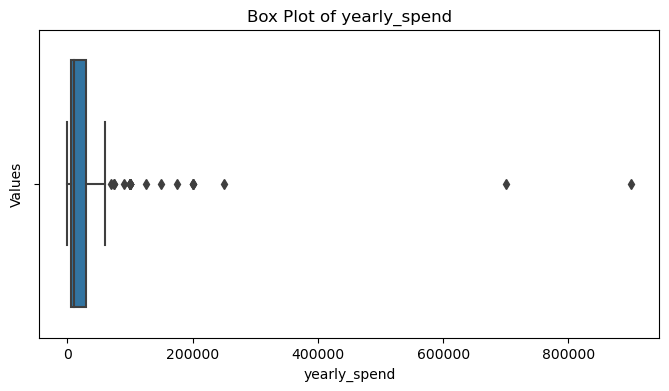

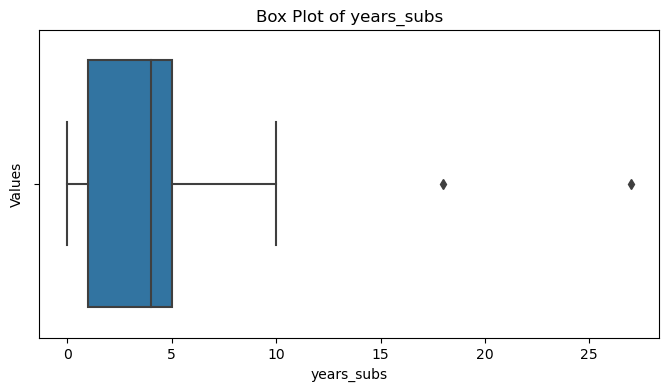

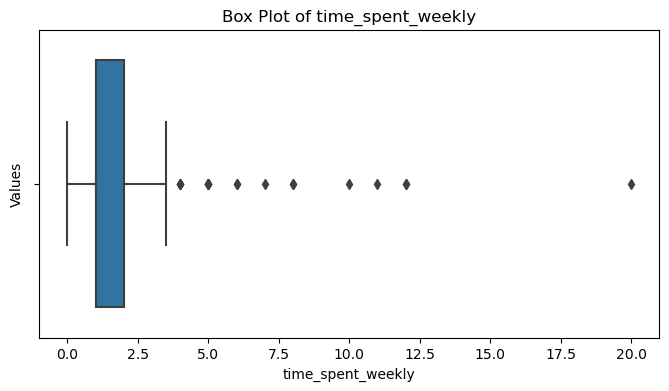

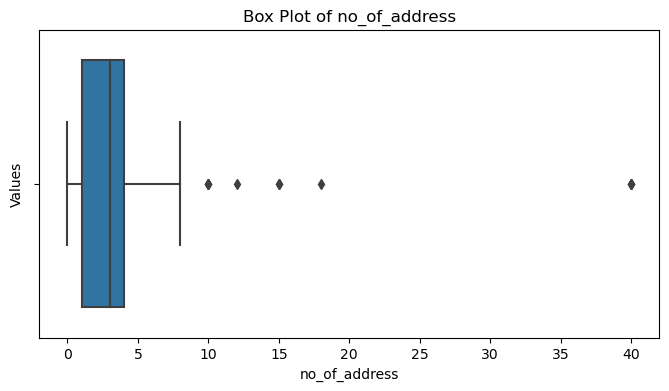

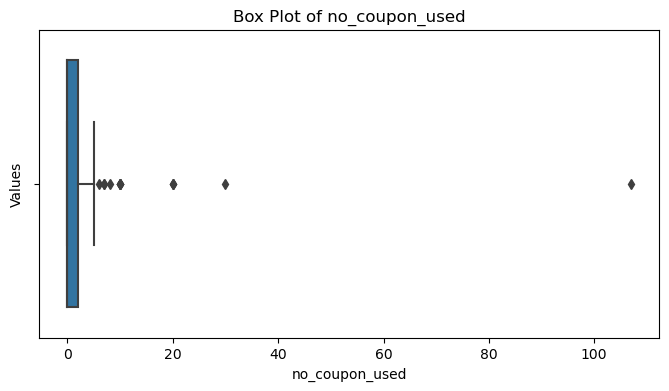

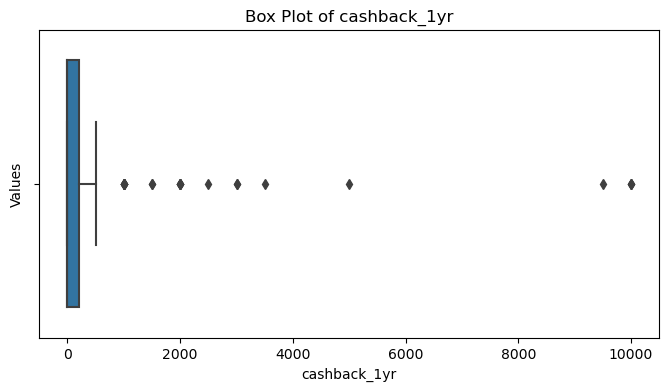

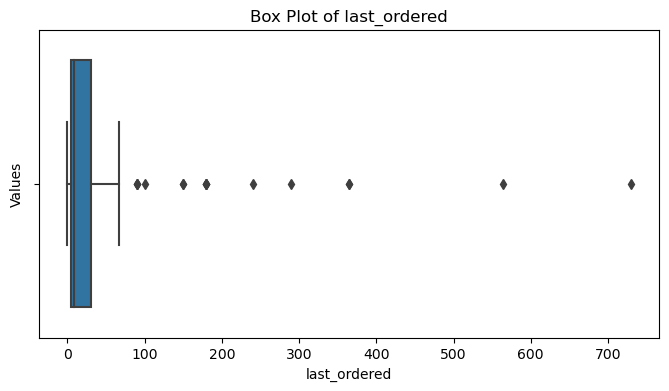

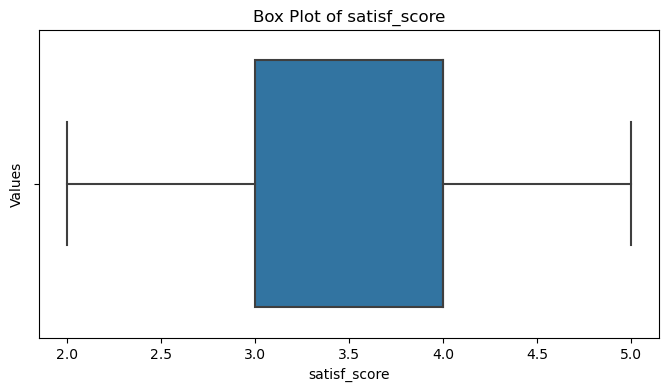

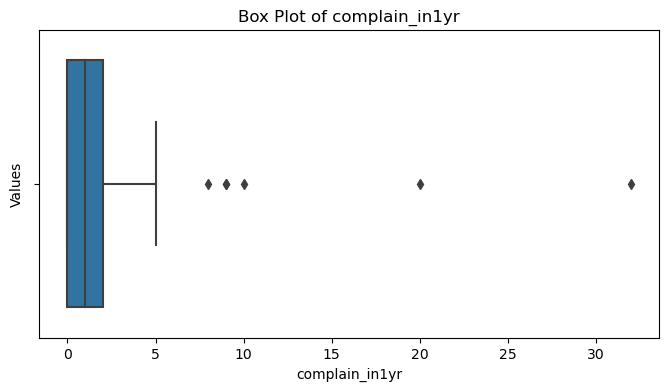

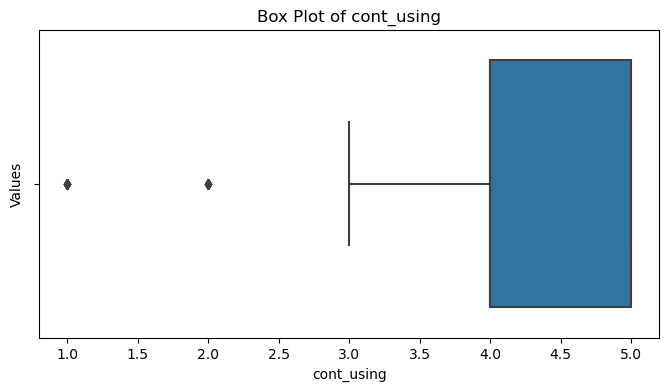

In [10]:
# Creating separate box plots for each numerical variable
for column in num:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=column, data=df)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
plt.show()

In [11]:
# Defining a function to remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [12]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur = remove_outlier(df[column])
        df[column] = np.where(df[column]>ur,ur,df[column])
        df[column] = np.where(df[column]<lr,lr,df[column])

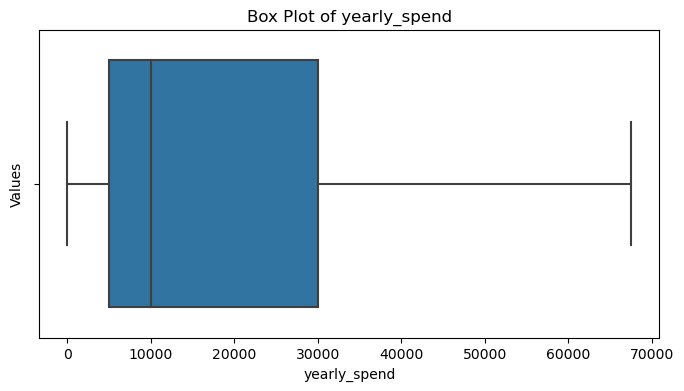

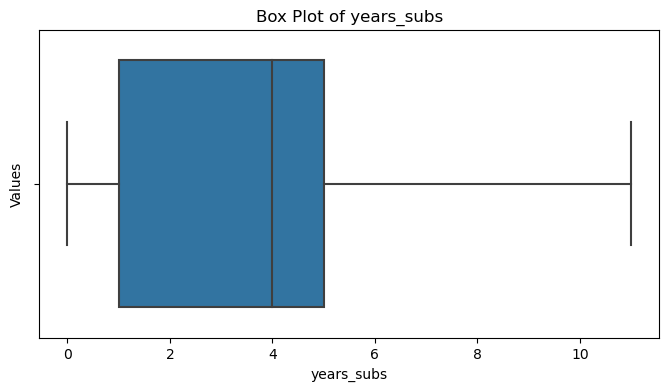

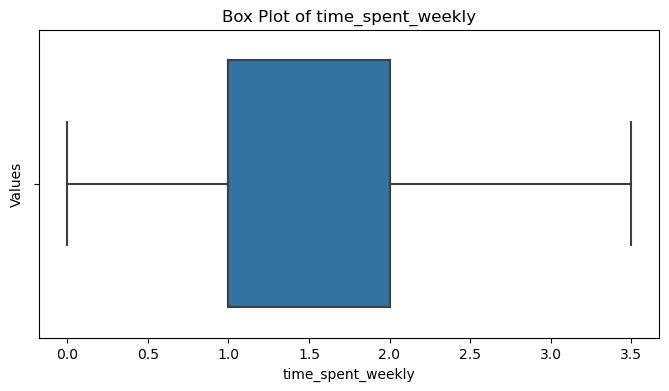

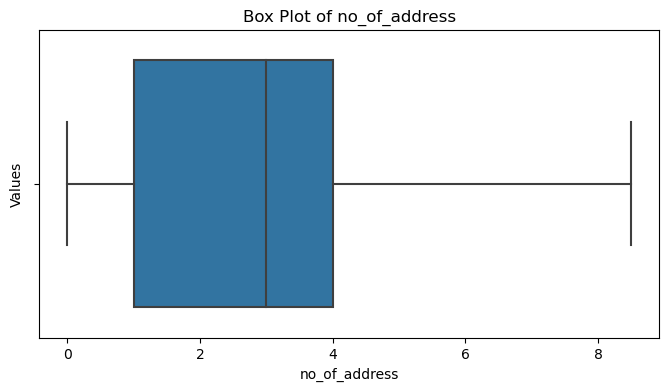

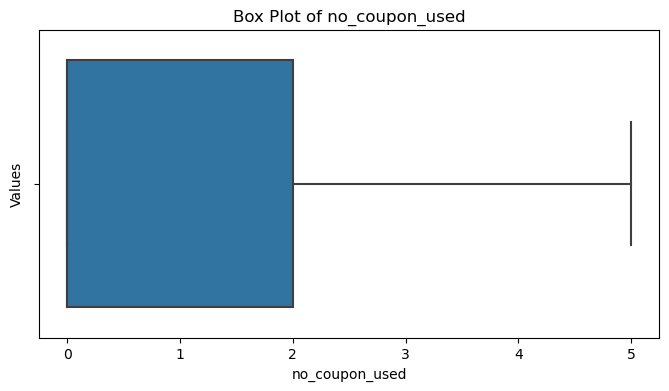

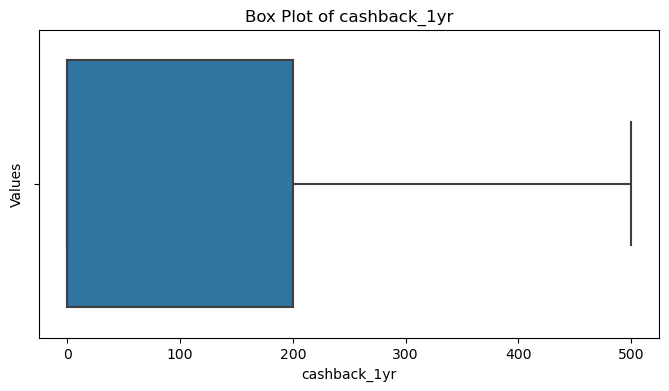

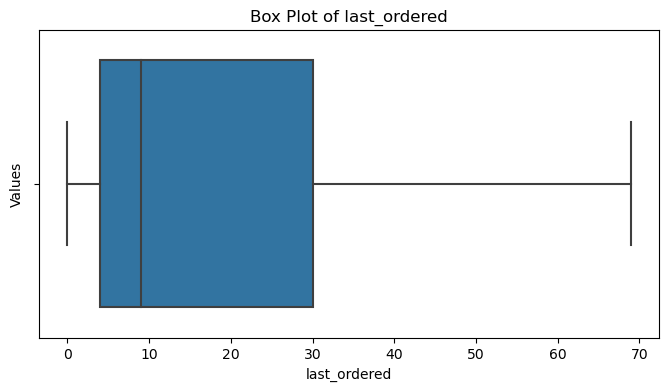

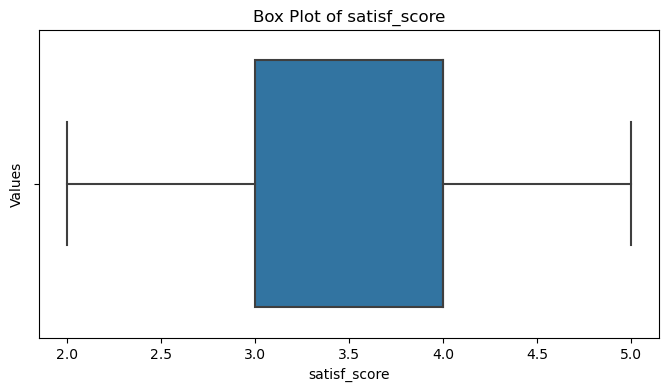

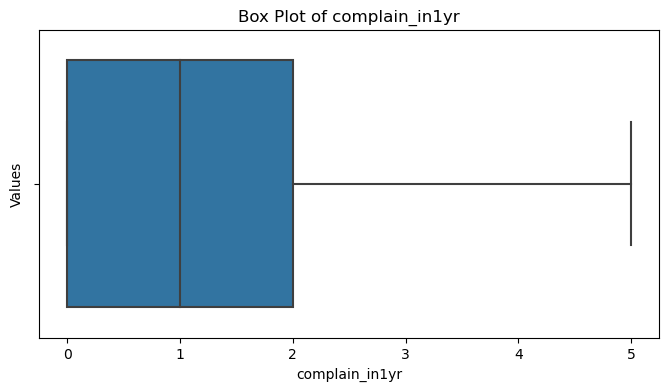

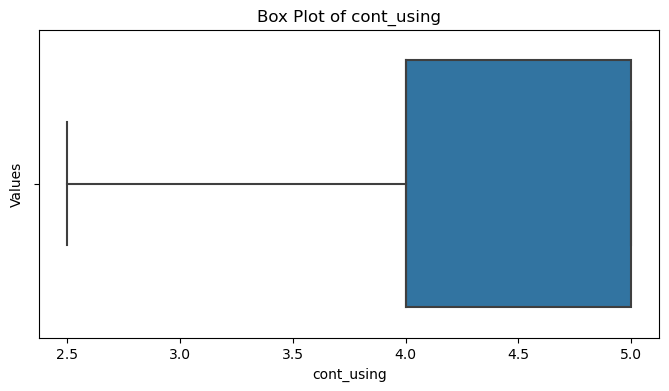

In [13]:
# Creating separate box plots again for each numerical variable to check if the outliers are removed
for column in num:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=column, data=df)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
plt.show()

In [14]:
df.to_excel('ChurnDataforVis.xlsx', index = False)

In [15]:
df1 = df.drop(['Email address'],axis=1)

In [16]:
df1.head()

,age,gender,Area,Marital status,Qualification,Employment status,Annual Income,Freq_usage,Recency,spending_per_purchase,...,most_useful_feat,reason_subsc,likely_reco,cont_using,other_attempt,reason_other_attempt,improve_sugg,aware_discount,loyalty_prog,pur_promo_eff
0,25-34,Female,City,Single,Master's degree,Employed,5-10 lacs per annum,Very Frequently (Several times a week),Within the last week,"500 INR - 1,000 INR",...,User-Friendly Interface:The easy-to-use and in...,Free fast delivery options,Very Likely,5.0,Yes,NaN,NaN,Yes,Yes,Moderately
1,25-34,Female,City,Single,Master's degree,Unemployed,Not applicable,Occasionally (A few times a month),Within the last week,"1,000 INR - 5,000 INR",...,User-Friendly Interface:The easy-to-use and in...,Video streaming,Likely,4.0,Yes,NaN,NaN,No,Maybe,Slightly
2,25-34,Male,City,Single,Master's degree,Student,Not applicable,Frequently (About once a week),Within the last week,"500 INR - 1,000 INR",...,User-Friendly Interface:The easy-to-use and in...,Video streaming,Neutral,5.0,No,NaN,NaN,No,No,Not at all
3,15-24,Female,City,Married,Master's degree,Employed,I do not wish to disclose,Occasionally (A few times a month),Within the last month,"> 10,000 INR",...,User-Friendly Interface:The easy-to-use and in...,"Not Applicable, I am not a prime member",Neutral,3.0,Yes,NaN,NaN,No,Maybe,Moderately
4,25-34,Male,City,Single,Master's degree,Employed,I do not wish to disclose,Occasionally (A few times a month),Within the last month,"> 10,000 INR",...,Features and Functionality: The range of featu...,Video streaming,Neutral,3.0,No,NaN,NaN,Yes,Yes,Moderately


In [17]:
cat = []
num = []
for i in df1.columns:
  if df1[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['age', 'gender', 'Area', 'Marital status', 'Qualification', 'Employment status ', 'Annual Income', 'Freq_usage', 'Recency', 'spending_per_purchase', 'Subscription', 'other_pref_portal', 'login_device_pref', 'most_purchase_cat', 'mode_of_payment', 'no_reg_device', 'usage_rating', 'supp_ser_satisf', 'delivery_time_satisf', 'pref_web_or_app', 'Place_1stheard', 'most_useful_feat', 'reason_subsc', 'likely_reco', 'other_attempt', 'reason_other_attempt', 'improve_sugg', 'aware_discount', 'loyalty_prog', 'pur_promo_eff']
num =  ['yearly_spend', 'years_subs', 'time_spent_weekly', 'no_of_address', 'no_coupon_used', 'cashback_1yr', 'last_ordered', 'satisf_score', 'complain_in1yr', 'cont_using']


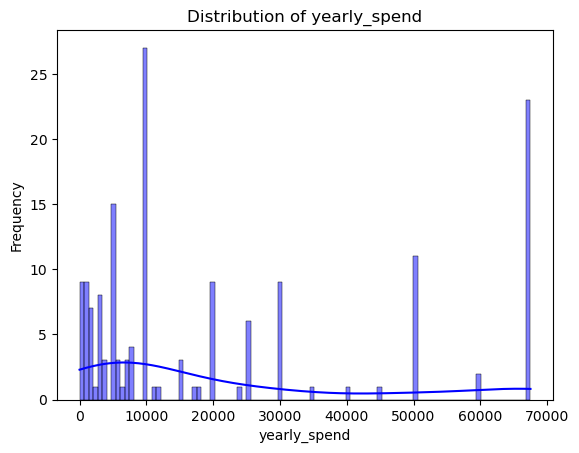

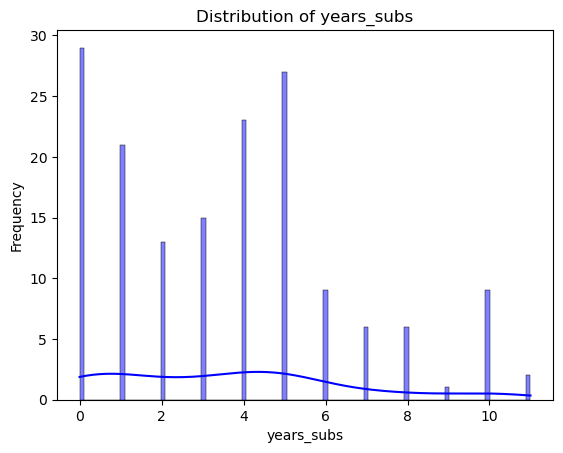

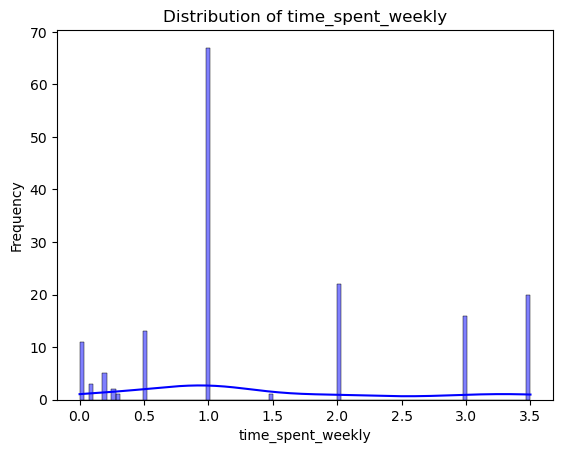

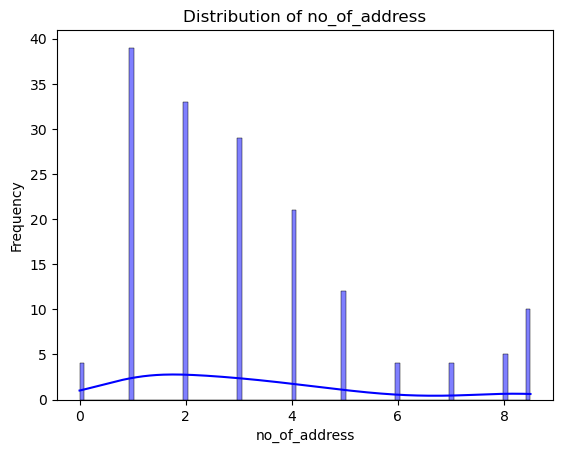

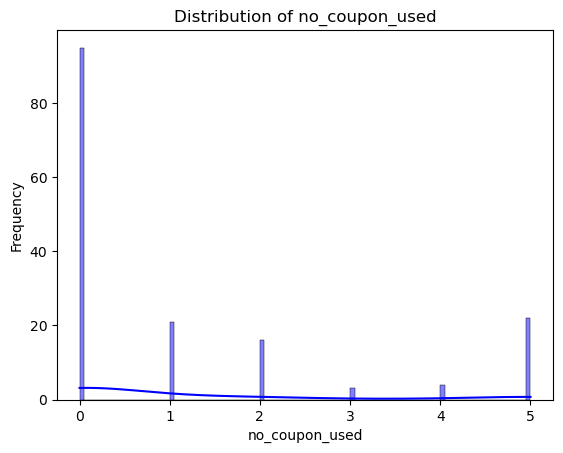

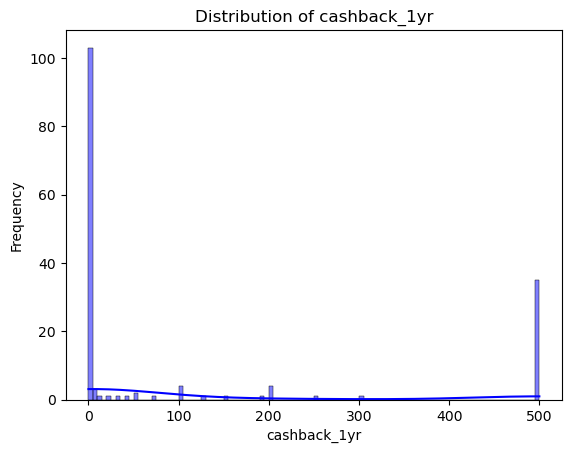

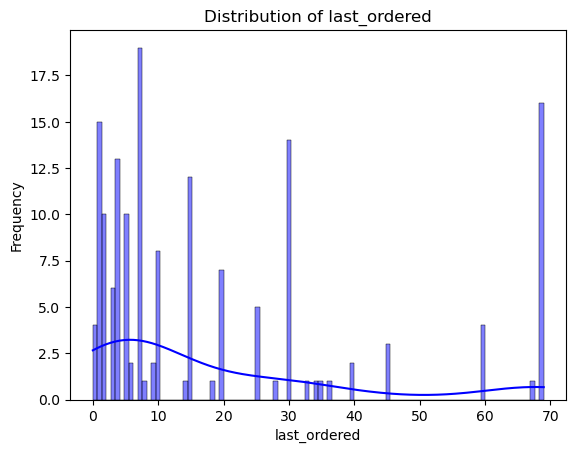

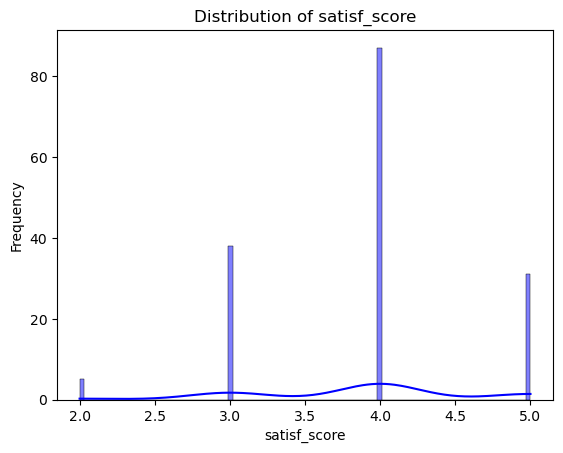

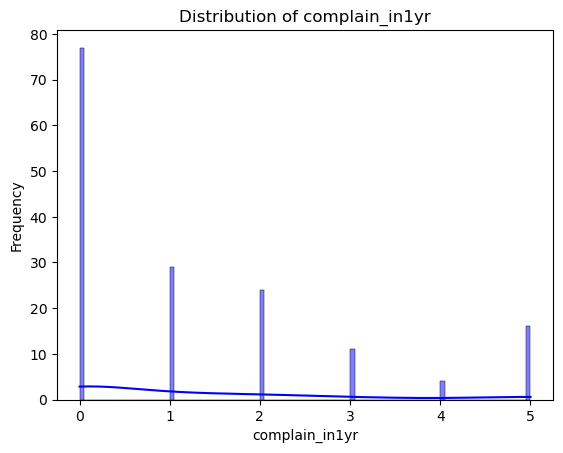

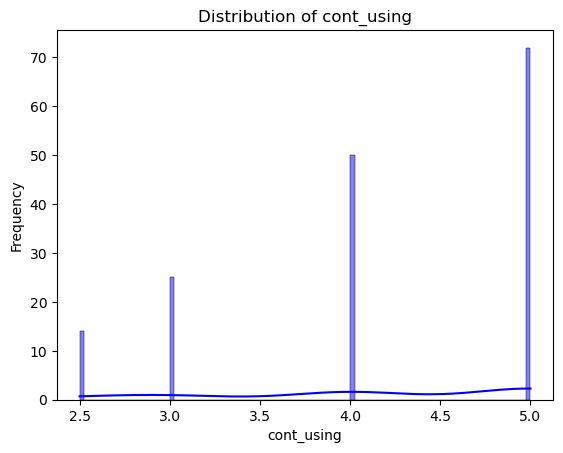

In [18]:
# For all numerical variables
for i in num:
    sns.histplot(df1[i], bins=100, kde=True, color='blue')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {i}')
    plt.grid(False)
    plt.show()

In [19]:
condition1=df['cont_using']==3
condition2=df['other_attempt']=='Yes'
condition3=df['cont_using']<3

df['Churn'] = np.where((condition1 & condition2)|condition3, '1', '0')


In [20]:
df['Churn'].value_counts()

0    133
1     28
Name: Churn, dtype: int64

In [21]:
df1= df.copy()

In [22]:
cat = []
num = []
for i in df1.columns:
  if df1[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print()
print('num = ',num)

cat =  ['Email address', 'age', 'gender', 'Area', 'Marital status', 'Qualification', 'Employment status ', 'Annual Income', 'Freq_usage', 'Recency', 'spending_per_purchase', 'Subscription', 'other_pref_portal', 'login_device_pref', 'most_purchase_cat', 'mode_of_payment', 'no_reg_device', 'usage_rating', 'supp_ser_satisf', 'delivery_time_satisf', 'pref_web_or_app', 'Place_1stheard', 'most_useful_feat', 'reason_subsc', 'likely_reco', 'other_attempt', 'reason_other_attempt', 'improve_sugg', 'aware_discount', 'loyalty_prog', 'pur_promo_eff', 'Churn']

num =  ['yearly_spend', 'years_subs', 'time_spent_weekly', 'no_of_address', 'no_coupon_used', 'cashback_1yr', 'last_ordered', 'satisf_score', 'complain_in1yr', 'cont_using']


In [23]:
#for categorical variable doing bivariate analysis

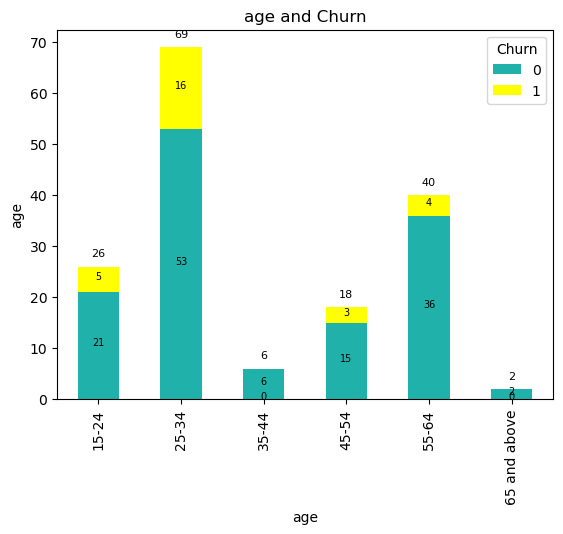

Churn                  0          1  Total
age                                       
15-24          80.769231  19.230769  100.0
25-34          76.811594  23.188406  100.0
35-44         100.000000        NaN  100.0
45-54          83.333333  16.666667  100.0
55-64          90.000000  10.000000  100.0
65 and above  100.000000        NaN  100.0


In [24]:
# Age and Churn
# Group the DataFrame by Age and Churn, and count occurrences
grouped = df1.groupby(['age', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 2, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('age')
ax.set_title('age and Churn')
ax.legend(title = 'Churn', loc = 'upper right')
plt.show()
print(percentage_grouped)

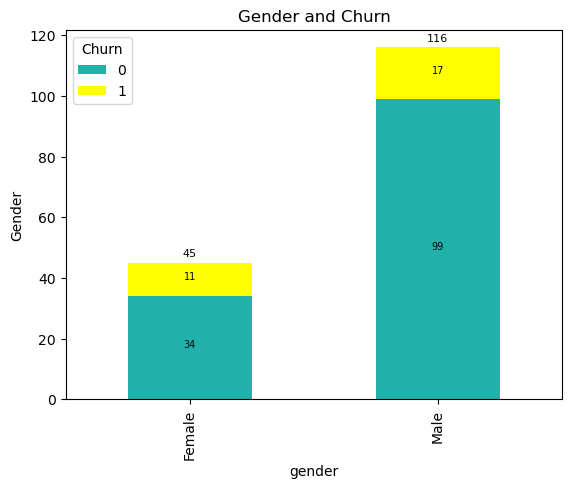

Churn           0          1  Total
gender                             
Female  75.555556  24.444444  100.0
Male    85.344828  14.655172  100.0


In [25]:
# Gender and Churn
# Group the DataFrame by PreferredLoginDevice and Churn, and count occurrences
grouped = df1.groupby(['gender', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 2, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Gender')
ax.set_title('Gender and Churn')
ax.legend(title = 'Churn', loc = 'upper left')
plt.show()
print(percentage_grouped)

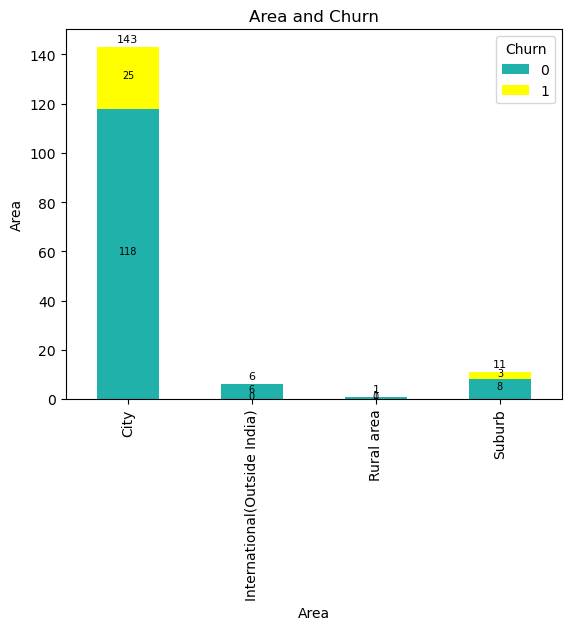

Churn                                  0          1  Total
Area                                                      
City                           82.517483  17.482517  100.0
International(Outside India)  100.000000        NaN  100.0
Rural area                    100.000000        NaN  100.0
Suburb                         72.727273  27.272727  100.0


In [26]:
# Area and Churn
# Group the DataFrame by PreferredLoginDevice and Churn, and count occurrences
grouped = df1.groupby(['Area', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 2, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Area')
ax.set_title('Area and Churn')
ax.legend(title = 'Churn', loc = 'upper right')

plt.show()
print(percentage_grouped)

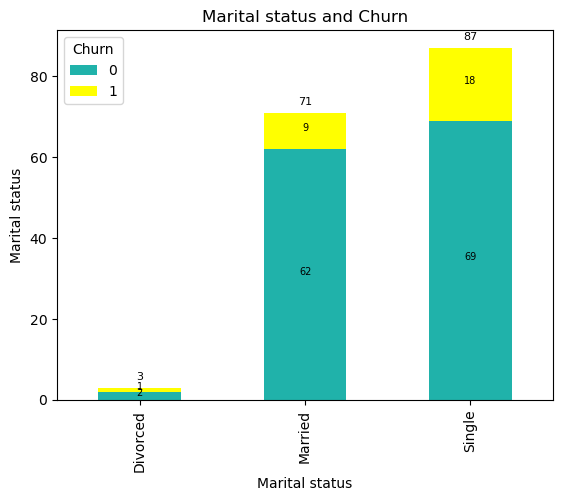

Churn                   0          1  Total
Marital status                             
Divorced        66.666667  33.333333  100.0
Married         87.323944  12.676056  100.0
Single          79.310345  20.689655  100.0


In [27]:
# Marital status and Churn
# Group the DataFrame by PreferredLoginDevice and Churn, and count occurrences
grouped = df1.groupby(['Marital status', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 2, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Marital status')
ax.set_title('Marital status and Churn')
ax.legend(title = 'Churn', loc = 'upper left')

plt.show()
print(percentage_grouped)

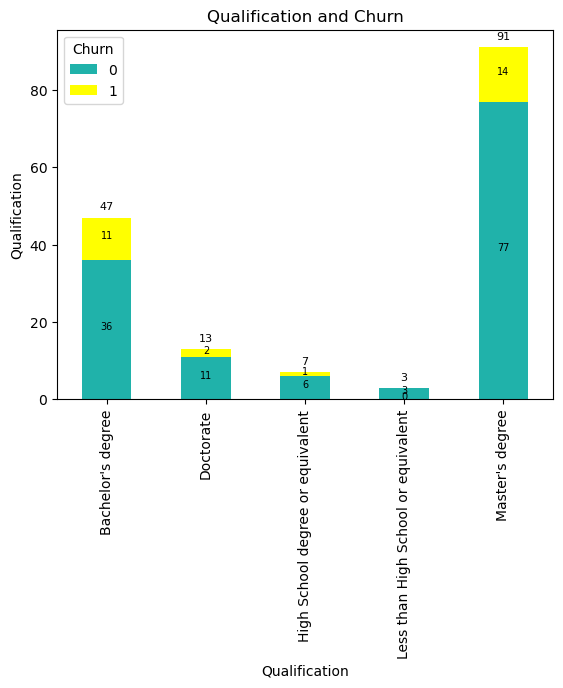

Churn                                         0          1  Total
Qualification                                                    
Bachelor's degree                     76.595745  23.404255  100.0
Doctorate                             84.615385  15.384615  100.0
High School degree or equivalent      85.714286  14.285714  100.0
Less than High School or equivalent  100.000000        NaN  100.0
Master's degree                       84.615385  15.384615  100.0


In [28]:
# Qualification and Churn
# Group the DataFrame by Qualification and Churn, and count occurrences
grouped = df1.groupby(['Qualification', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 2, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Qualification')
ax.set_title('Qualification and Churn')
ax.legend(title = 'Churn', loc = 'upper left')

plt.show()
print(percentage_grouped)

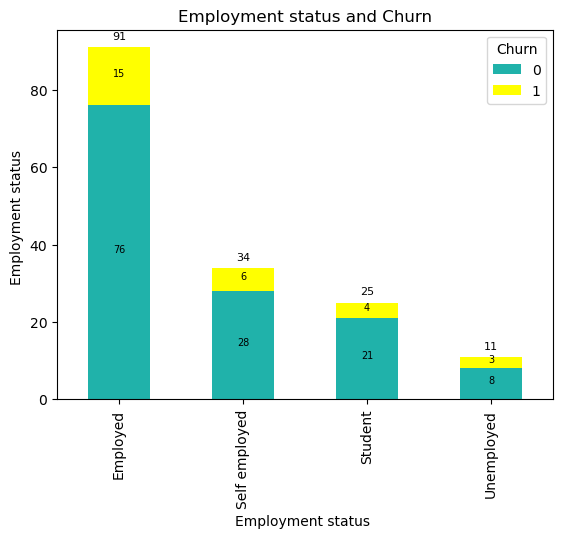

Churn                       0          1  Total
Employment status                              
Employed            83.516484  16.483516  100.0
Self employed       82.352941  17.647059  100.0
Student             84.000000  16.000000  100.0
Unemployed          72.727273  27.272727  100.0


In [29]:
# Qualification and Churn
# Group the DataFrame by Qualification and Churn, and count occurrences
grouped = df1.groupby(['Employment status ', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 2, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Employment status ')
ax.set_title('Employment status and Churn')
ax.legend(title = 'Churn', loc = 'upper right')

plt.show()
print(percentage_grouped)

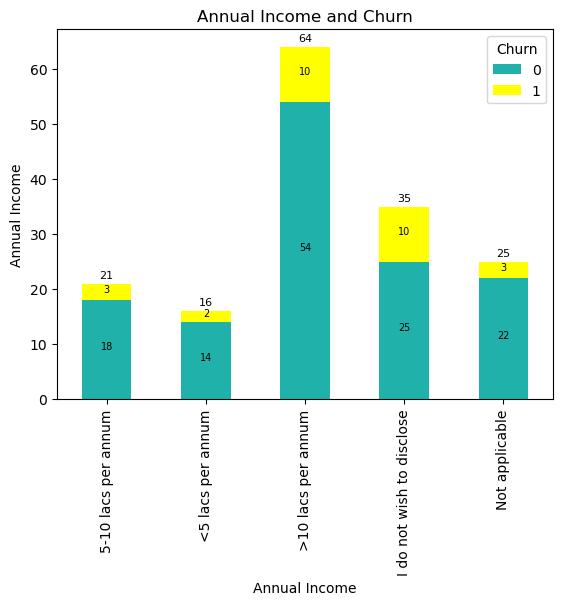

Churn                              0          1  Total
Annual Income                                         
5-10 lacs per annum        85.714286  14.285714  100.0
<5 lacs per annum          87.500000  12.500000  100.0
>10 lacs per annum         84.375000  15.625000  100.0
I do not wish to disclose  71.428571  28.571429  100.0
Not applicable             88.000000  12.000000  100.0


In [30]:
# Annual Income and Churn
# Group the DataFrame by Qualification and Churn, and count occurrences
grouped = df1.groupby(['Annual Income', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 1, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Annual Income')
ax.set_title('Annual Income and Churn')
ax.legend(title = 'Churn', loc = 'upper right')

plt.show()
print(percentage_grouped)

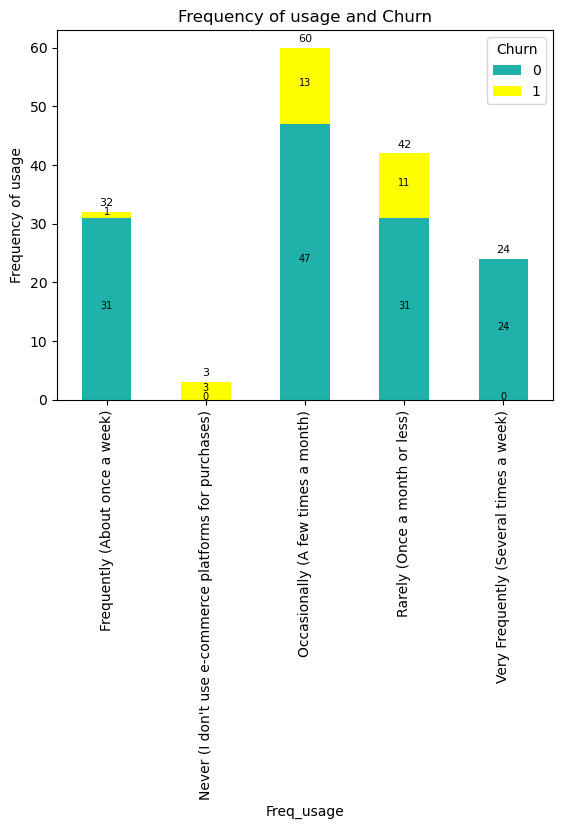

Churn                                                        0           1  \
Freq_usage                                                                   
Frequently (About once a week)                       96.875000    3.125000   
Never (I don't use e-commerce platforms for pur...         NaN  100.000000   
Occasionally (A few times a month)                   78.333333   21.666667   
Rarely (Once a month or less)                        73.809524   26.190476   
Very Frequently (Several times a week)              100.000000         NaN   

Churn                                               Total  
Freq_usage                                                 
Frequently (About once a week)                      100.0  
Never (I don't use e-commerce platforms for pur...  100.0  
Occasionally (A few times a month)                  100.0  
Rarely (Once a month or less)                       100.0  
Very Frequently (Several times a week)              100.0  


In [31]:
# Freq_usage and Churn
# Group the DataFrame by Freq_usage and Churn, and count occurrences
grouped = df1.groupby(['Freq_usage', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 1, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Frequency of usage')
ax.set_title('Frequency of usage and Churn')
ax.legend(title = 'Churn', loc = 'upper right')

plt.show()
print(percentage_grouped)

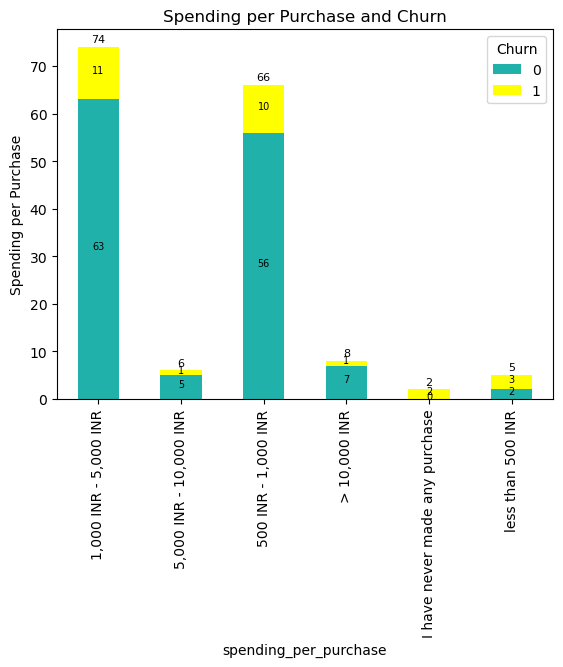

Churn                                   0           1  Total
spending_per_purchase                                       
1,000 INR - 5,000 INR           85.135135   14.864865  100.0
5,000 INR - 10,000 INR          83.333333   16.666667  100.0
500 INR - 1,000 INR             84.848485   15.151515  100.0
> 10,000 INR                    87.500000   12.500000  100.0
I have never made any purchase        NaN  100.000000  100.0
less than 500 INR               40.000000   60.000000  100.0


In [32]:
# Spending per purchase and Churn
# Group the DataFrame by Spending per purchase, and count occurrences
grouped = df1.groupby(['spending_per_purchase', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 1, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Spending per Purchase')
ax.set_title('Spending per Purchase and Churn')
ax.legend(title = 'Churn', loc = 'upper right')

plt.show()
print(percentage_grouped)

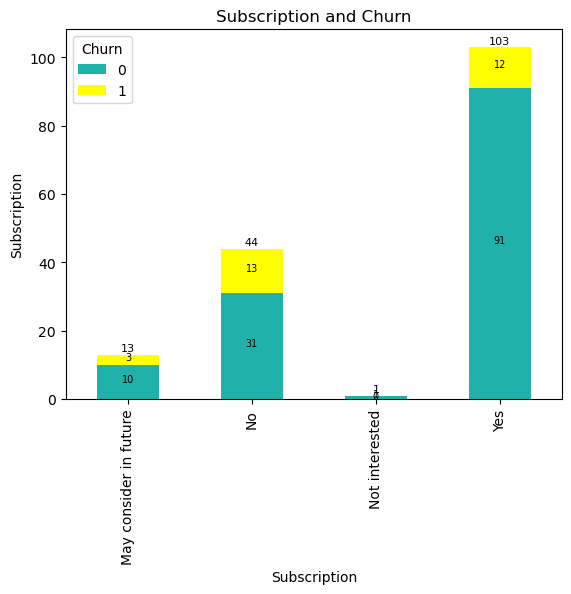

Churn                            0          1  Total
Subscription                                        
May consider in future   76.923077  23.076923  100.0
No                       70.454545  29.545455  100.0
Not interested          100.000000        NaN  100.0
Yes                      88.349515  11.650485  100.0


In [33]:
# Subscription and Churn
# Group the DataFrame by Subscription and Churn, and count occurrences
grouped = df1.groupby(['Subscription', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 1, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Subscription')
ax.set_title('Subscription and Churn')
ax.legend(title = 'Churn', loc = 'upper left')

plt.show()
print(percentage_grouped)

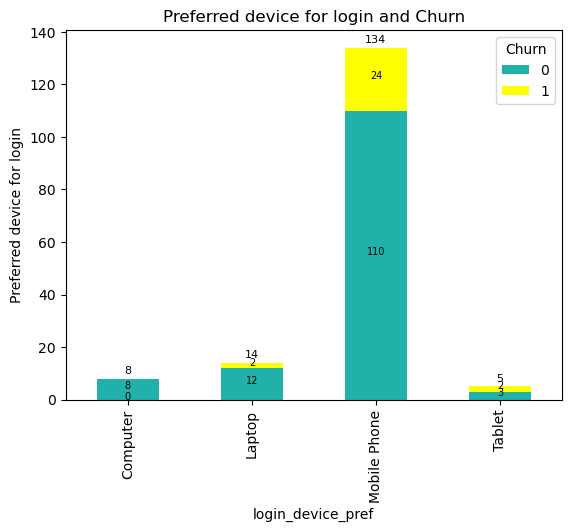

Churn                       0          1  Total
login_device_pref                              
Computer           100.000000        NaN  100.0
Laptop              85.714286  14.285714  100.0
Mobile Phone        82.089552  17.910448  100.0
Tablet              60.000000  40.000000  100.0


In [34]:
# login_device_pref and Churn
# Group the DataFrame by login_device_pref and Churn, and count occurrences
grouped = df1.groupby(['login_device_pref', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 2, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Preferred device for login')
ax.set_title('Preferred device for login and Churn')
ax.legend(title = 'Churn', loc = 'upper right')

plt.show()
print(percentage_grouped)

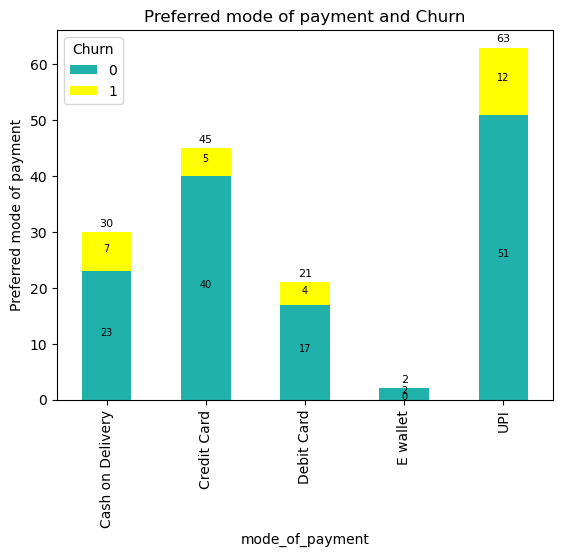

Churn                      0          1  Total
mode_of_payment                               
Cash on Delivery   76.666667  23.333333  100.0
Credit Card        88.888889  11.111111  100.0
Debit Card         80.952381  19.047619  100.0
E wallet          100.000000        NaN  100.0
UPI                80.952381  19.047619  100.0


In [35]:
# mode_of_payment and Churn
# Group the DataFrame by mode_of_payment and Churn, and count occurrences
grouped = df1.groupby(['mode_of_payment', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 1, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Preferred mode of payment')
ax.set_title('Preferred mode of payment and Churn')
ax.legend(title = 'Churn', loc = 'upper left')

plt.show()
print(percentage_grouped)

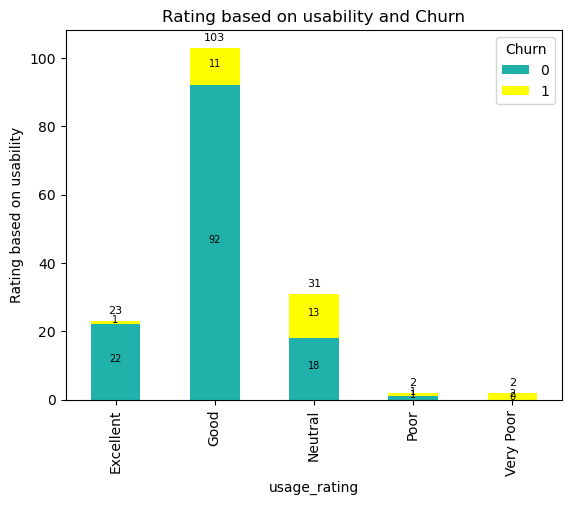

Churn                 0           1  Total
usage_rating                              
Excellent     95.652174    4.347826  100.0
Good          89.320388   10.679612  100.0
Neutral       58.064516   41.935484  100.0
Poor          50.000000   50.000000  100.0
Very Poor           NaN  100.000000  100.0


In [36]:
# usage_rating and Churn
# Group the DataFrame by login_device_pref and Churn, and count occurrences
grouped = df1.groupby(['usage_rating', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 2, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Rating based on usability')
ax.set_title('Rating based on usability and Churn')
ax.legend(title = 'Churn', loc = 'upper right')

plt.show()
print(percentage_grouped)

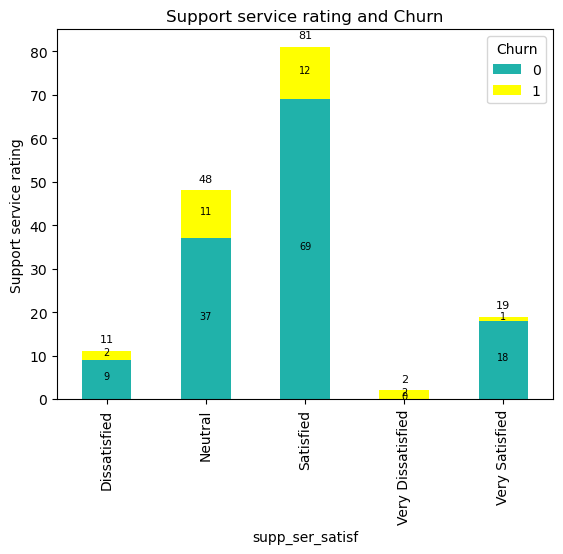

Churn                      0           1  Total
supp_ser_satisf                                
Dissatisfied       81.818182   18.181818  100.0
Neutral            77.083333   22.916667  100.0
Satisfied          85.185185   14.814815  100.0
Very Dissatisfied        NaN  100.000000  100.0
Very Satisfied     94.736842    5.263158  100.0


In [37]:
# supp_ser_satisf and Churn
# Group the DataFrame by supp_ser_satisf and Churn, and count occurrences
grouped = df1.groupby(['supp_ser_satisf', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 2, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Support service rating')
ax.set_title('Support service rating and Churn')
ax.legend(title = 'Churn', loc = 'upper right')

plt.show()
print(percentage_grouped)

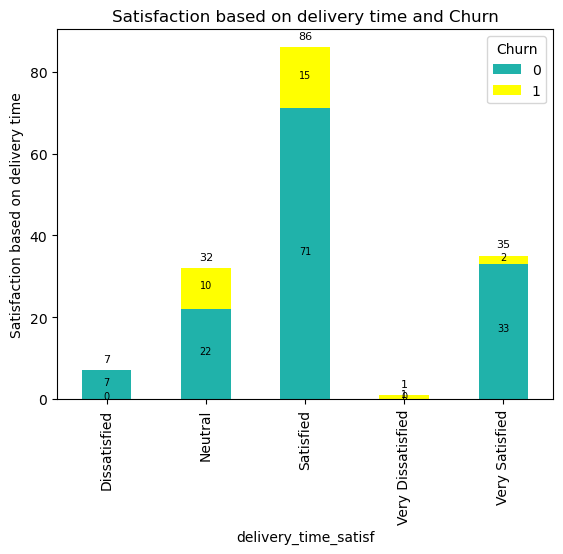

Churn                          0           1  Total
delivery_time_satisf                               
Dissatisfied          100.000000         NaN  100.0
Neutral                68.750000   31.250000  100.0
Satisfied              82.558140   17.441860  100.0
Very Dissatisfied            NaN  100.000000  100.0
Very Satisfied         94.285714    5.714286  100.0


In [38]:
# delivery_time_satisf and Churn
# Group the DataFrame by delivery_time_satisf and Churn, and count occurrences
grouped = df1.groupby(['delivery_time_satisf', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 2, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Satisfaction based on delivery time')
ax.set_title('Satisfaction based on delivery time and Churn')
ax.legend(title = 'Churn', loc = 'upper right')

plt.show()
print(percentage_grouped)

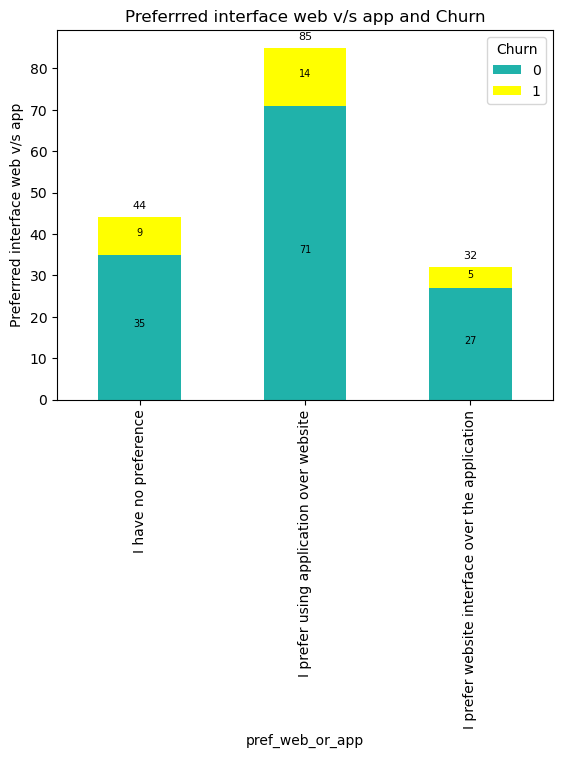

Churn                                                    0          1  Total
pref_web_or_app                                                             
I have no preference                             79.545455  20.454545  100.0
I prefer using application over website          83.529412  16.470588  100.0
I prefer website interface over the application  84.375000  15.625000  100.0


In [39]:
# pref_web_or_app and Churn
# Group the DataFrame by pref_web_or_app and Churn, and count occurrences
grouped = df1.groupby(['pref_web_or_app', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 2, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Preferrred interface web v/s app')
ax.set_title('Preferrred interface web v/s app and Churn')
ax.legend(title = 'Churn', loc = 'upper right')

plt.show()
print(percentage_grouped)

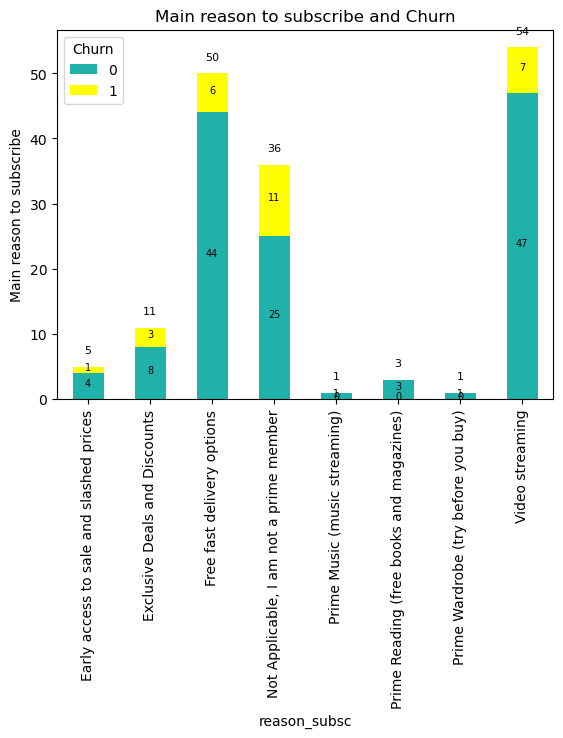

Churn                                              0          1  Total
reason_subsc                                                          
Early access to sale and slashed prices    80.000000  20.000000  100.0
Exclusive Deals and Discounts              72.727273  27.272727  100.0
Free fast delivery options                 88.000000  12.000000  100.0
Not Applicable, I am not a prime member    69.444444  30.555556  100.0
Prime Music (music streaming)             100.000000        NaN  100.0
Prime Reading (free books and magazines)  100.000000        NaN  100.0
Prime Wardrobe (try before you buy)       100.000000        NaN  100.0
Video streaming                            87.037037  12.962963  100.0


In [40]:
# reason_subsc and Churn
# Group the DataFrame by reason_subsc and Churn, and count occurrences
grouped = df1.groupby(['reason_subsc', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 2, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Main reason to subscribe')
ax.set_title('Main reason to subscribe and Churn')
ax.legend(title = 'Churn', loc = 'upper left')

plt.show()
print(percentage_grouped)

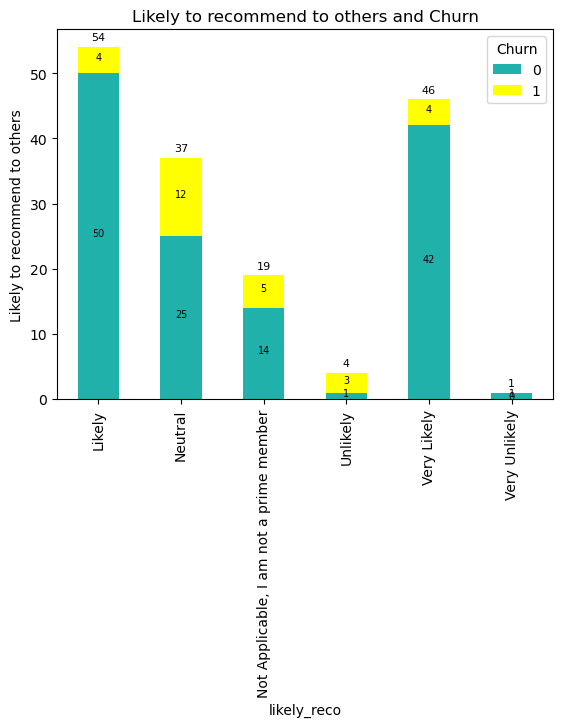

Churn                                             0          1  Total
likely_reco                                                          
Likely                                    92.592593   7.407407  100.0
Neutral                                   67.567568  32.432432  100.0
Not Applicable, I am not a prime member   73.684211  26.315789  100.0
Unlikely                                  25.000000  75.000000  100.0
Very Likely                               91.304348   8.695652  100.0
Very Unlikely                            100.000000        NaN  100.0


In [41]:
# likely_reco and Churn
# Group the DataFrame by likely_reco and Churn, and count occurrences
grouped = df1.groupby(['likely_reco', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 1, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Likely to recommend to others')
ax.set_title('Likely to recommend to others and Churn')
ax.legend(title = 'Churn', loc = 'upper right')

plt.show()
print(percentage_grouped)

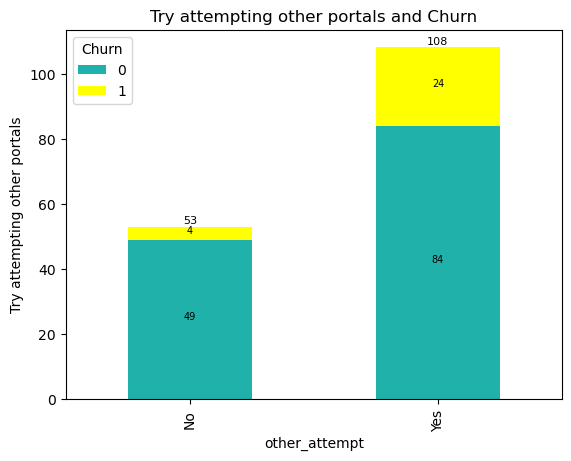

Churn                  0          1  Total
other_attempt                             
No             92.452830   7.547170  100.0
Yes            77.777778  22.222222  100.0


In [42]:
# other_attempt and Churn
# Group the DataFrame by other_attempt and Churn, and count occurrences
grouped = df1.groupby(['other_attempt', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 1, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Try attempting other portals')
ax.set_title('Try attempting other portals and Churn')
ax.legend(title = 'Churn', loc = 'upper left')

plt.show()
print(percentage_grouped)

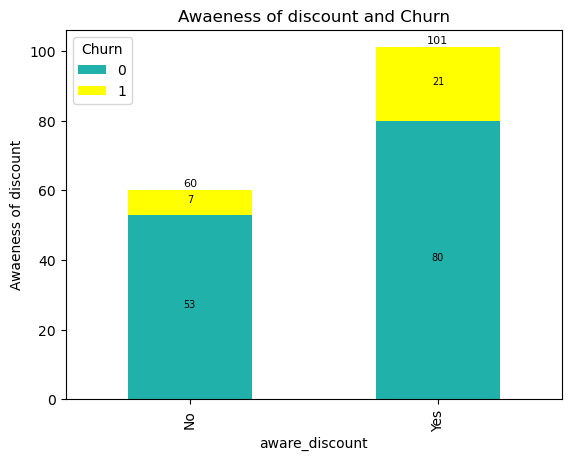

Churn                   0          1  Total
aware_discount                             
No              88.333333  11.666667  100.0
Yes             79.207921  20.792079  100.0


In [43]:
# aware_discount and Churn
# Group the DataFrame by likely_reco and Churn, and count occurrences
grouped = df1.groupby(['aware_discount', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 1, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Awaeness of discount')
ax.set_title('Awaeness of discount and Churn')
ax.legend(title = 'Churn', loc = 'upper left')

plt.show()
print(percentage_grouped)

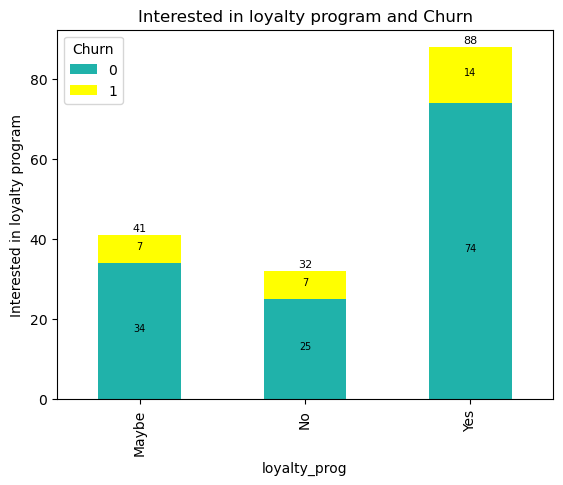

Churn                 0          1  Total
loyalty_prog                             
Maybe         82.926829  17.073171  100.0
No            78.125000  21.875000  100.0
Yes           84.090909  15.909091  100.0


In [44]:
# loyalty_prog and Churn
# Group the DataFrame by likely_reco and Churn, and count occurrences
grouped = df1.groupby(['loyalty_prog', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 1, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Interested in loyalty program')
ax.set_title('Interested in loyalty program and Churn')
ax.legend(title = 'Churn', loc = 'upper left')

plt.show()
print(percentage_grouped)

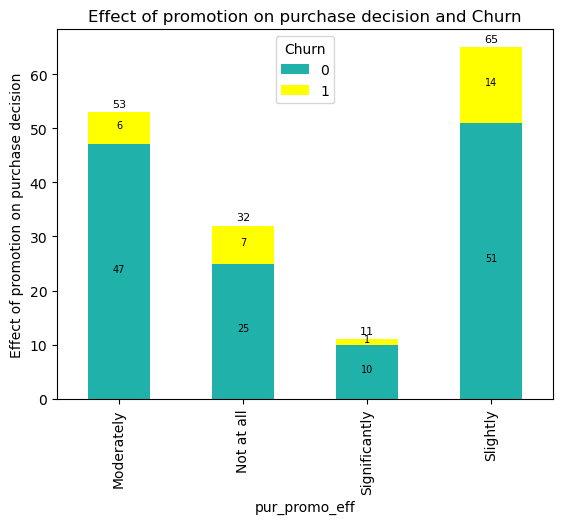

Churn                  0          1  Total
pur_promo_eff                             
Moderately     88.679245  11.320755  100.0
Not at all     78.125000  21.875000  100.0
Significantly  90.909091   9.090909  100.0
Slightly       78.461538  21.538462  100.0


In [45]:
# pur_promo_eff and Churn
# Group the DataFrame by pur_promo_eff and Churn, and count occurrences
grouped = df1.groupby(['pur_promo_eff', 'Churn']).size().unstack()
colors = ['lightseagreen', 'yellow']
ax = grouped.plot(kind = 'bar', stacked=True, color=colors)

for container in ax.containers:
    for bar in container.patches:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(),
                round(count), ha = 'center', color = 'black', size = 7)
# Sum of values
grouped['Total'] = grouped.sum(axis=1)
percentage_grouped = grouped.div(grouped['Total'], axis=0) * 100
# Total values labels
for i, total in enumerate(grouped['Total']):
    ax.text(i, total + 1, round(total),
            ha = 'center', color = 'black', size = 8)
ax.set_ylabel('Effect of promotion on purchase decision')
ax.set_title('Effect of promotion on purchase decision and Churn')
ax.legend(title = 'Churn', loc = 'upper center')

plt.show()
print(percentage_grouped)

In [46]:
#Analysis of numerical variables

In [47]:
# num =  ['yearly_spend', 'years_subs', 'time_spent_weekly', 'no_of_address', 'no_coupon_used', 'cashback_1yr', 'last_ordered', 'satisf_score', 'complain_in1yr', 'cont_using']

yearly_spend  0.0      2.0      700.0    722.0    800.0    1000.0   1200.0   \
Churn                                                                         
0                   5        0        0        1        1        3        1   
1                   2        2        1        0        0        1        1   

yearly_spend  2000.0   2500.0   3000.0   ...  20000.0  24000.0  25000.0  \
Churn                                    ...                              
0                   6        0        5  ...        7        1        5   
1                   1        1        3  ...        2        0        1   

yearly_spend  30000.0  35000.0  40000.0  45000.0  50000.0  60000.0  67500.0  
Churn                                                                        
0                   8        1        1        1       11        2       22  
1                   1        0        0        0        0        0        1  

[2 rows x 33 columns]


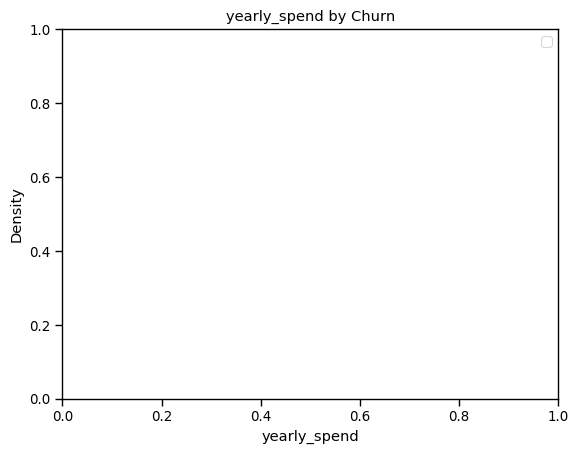

years_subs  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  \
Churn                                                                          
0             18    15    10    13    22    26     9     5     6     0     7   
1             11     6     3     2     1     1     0     1     0     1     2   

years_subs  11.0  
Churn             
0              2  
1              0  


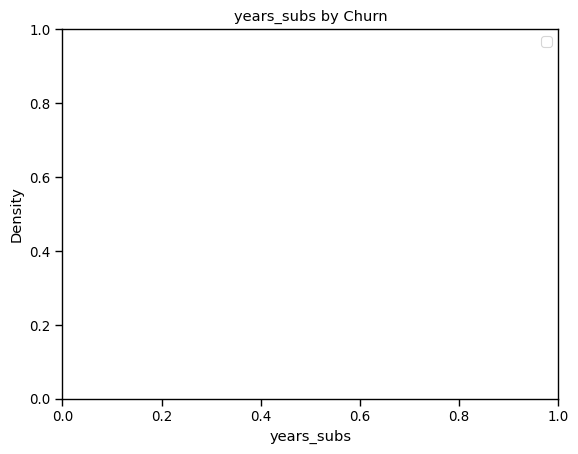

time_spent_weekly  0.00  0.10  0.20  0.25  0.30  0.50  1.00  1.50  2.00  3.00  \
Churn                                                                           
0                     7     1     4     2     1    11    59     1    17    14   
1                     4     2     1     0     0     2     8     0     5     2   

time_spent_weekly  3.50  
Churn                    
0                    16  
1                     4  


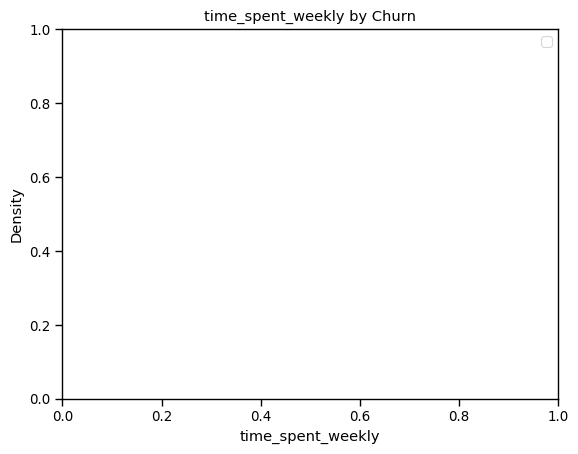

no_of_address  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  8.5
Churn                                                          
0                3   29   27   25   18   12    2    4    4    9
1                1   10    6    4    3    0    2    0    1    1


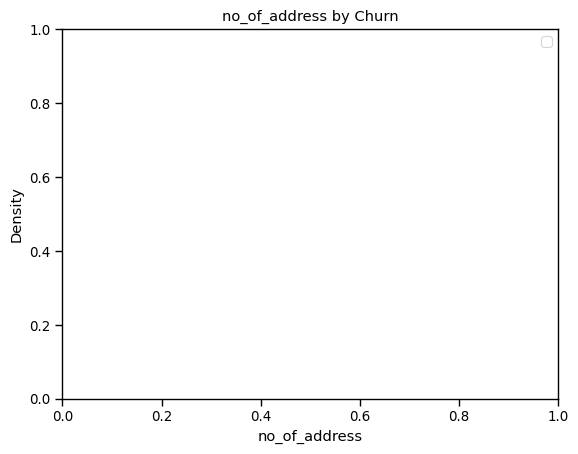

no_coupon_used  0.0  1.0  2.0  3.0  4.0  5.0
Churn                                       
0                79   14   13    3    3   21
1                16    7    3    0    1    1


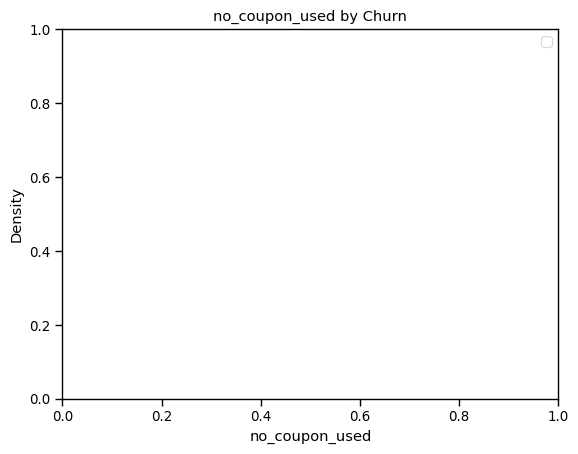

cashback_1yr  0.0    1.0    2.0    5.0    7.0    9.0    10.0   20.0   30.0   \
Churn                                                                         
0                77      2      3      1      1      1      1      0      1   
1                21      0      0      0      0      0      0      1      0   

cashback_1yr  40.0   50.0   70.0   100.0  125.0  150.0  190.0  200.0  250.0  \
Churn                                                                         
0                 1      2      1      1      1      1      1      3      1   
1                 0      0      0      3      0      0      0      1      0   

cashback_1yr  300.0  500.0  
Churn                       
0                 1     33  
1                 0      2  


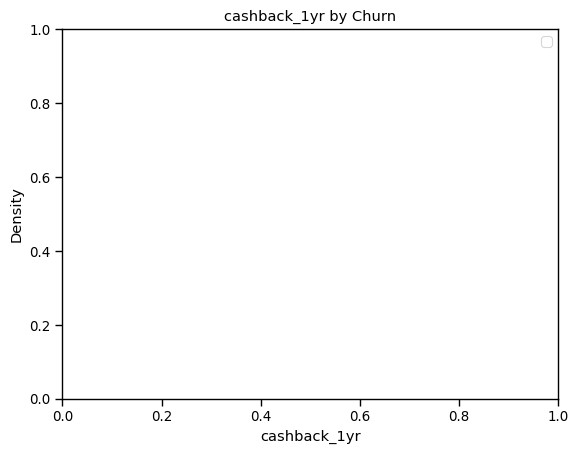

last_ordered  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   ...  \
Churn                                                                     ...   
0                2    15    10     6    12     8     2    15     1     2  ...   
1                2     0     0     0     1     2     0     4     0     0  ...   

last_ordered  30.0  33.0  34.0  35.0  36.0  40.0  45.0  60.0  67.0  69.0  
Churn                                                                     
0                9     0     0     1     1     1     1     3     1    12  
1                5     1     1     0     0     1     2     1     0     4  

[2 rows x 27 columns]


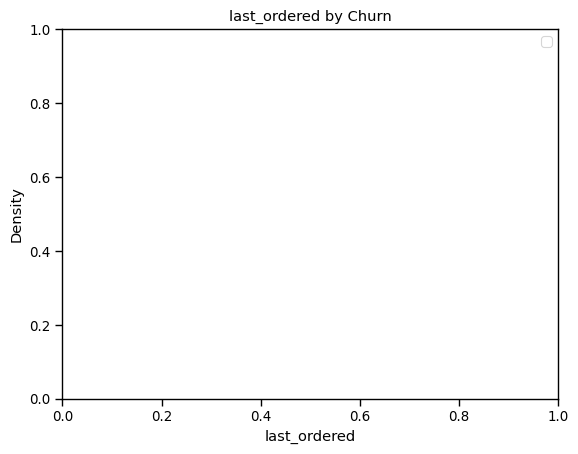

satisf_score  2.0  3.0  4.0  5.0
Churn                           
0               0   22   82   29
1               5   16    5    2


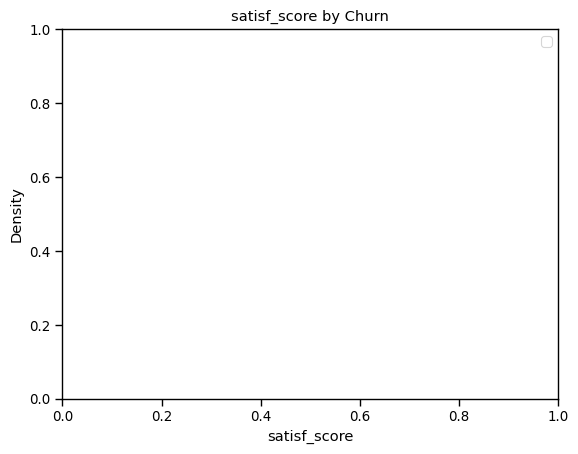

complain_in1yr  0.0  1.0  2.0  3.0  4.0  5.0
Churn                                       
0                60   23   20   11    4   15
1                17    6    4    0    0    1


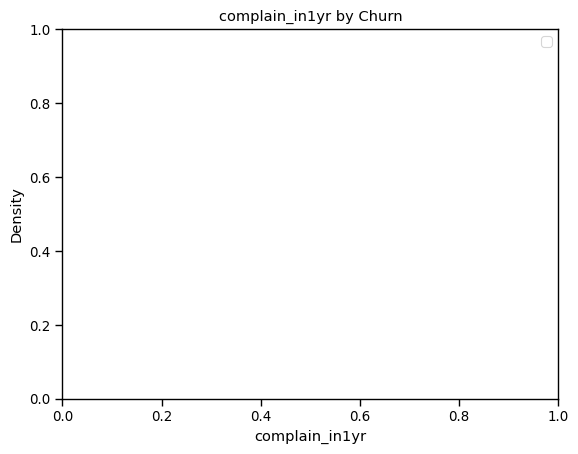

cont_using  2.5  3.0  4.0  5.0
Churn                         
0             0   11   50   72
1            14   14    0    0


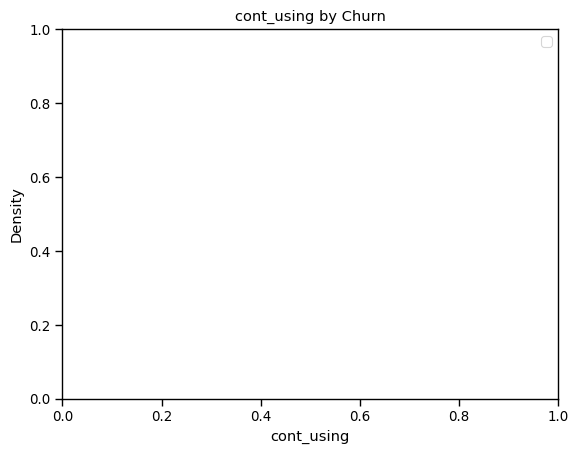

In [48]:
# for all numerical variables
sns.set_context("paper",font_scale = 1.1)
for i in num:
    cross_tab = pd.crosstab(df1['Churn'], df1[i])
    print(cross_tab)
    plt.figure()
    ax = sns.kdeplot(df1[i][(df1["Churn"] == 0) ], color = "Red", shade = True)
    ax = sns.kdeplot(df1[i][(df1["Churn"] == 1) ], ax = ax, color = "Blue", shade = True)
    ax.legend(["Not Churn","Churn"],loc = 'upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(i)
    ax.set_title(f'{i} by Churn')
    plt.show()

In [49]:
df2=df.copy()

In [50]:
df2.head()

,Email address,age,gender,Area,Marital status,Qualification,Employment status,Annual Income,Freq_usage,Recency,...,reason_subsc,likely_reco,cont_using,other_attempt,reason_other_attempt,improve_sugg,aware_discount,loyalty_prog,pur_promo_eff,Churn
0,arushi669@gmail.com,25-34,Female,City,Single,Master's degree,Employed,5-10 lacs per annum,Very Frequently (Several times a week),Within the last week,...,Free fast delivery options,Very Likely,5.0,Yes,NaN,NaN,Yes,Yes,Moderately,0
1,divyajain04196@gmail.com,25-34,Female,City,Single,Master's degree,Unemployed,Not applicable,Occasionally (A few times a month),Within the last week,...,Video streaming,Likely,4.0,Yes,NaN,NaN,No,Maybe,Slightly,0
2,sanadktiwari@gmail.com,25-34,Male,City,Single,Master's degree,Student,Not applicable,Frequently (About once a week),Within the last week,...,Video streaming,Neutral,5.0,No,NaN,NaN,No,No,Not at all,0
3,deeptisoni1997@gmail.com,15-24,Female,City,Married,Master's degree,Employed,I do not wish to disclose,Occasionally (A few times a month),Within the last month,...,"Not Applicable, I am not a prime member",Neutral,3.0,Yes,NaN,NaN,No,Maybe,Moderately,1
4,shivamrai.du.or.20@gmail.com,25-34,Male,City,Single,Master's degree,Employed,I do not wish to disclose,Occasionally (A few times a month),Within the last month,...,Video streaming,Neutral,3.0,No,NaN,NaN,Yes,Yes,Moderately,0


<Axes: >

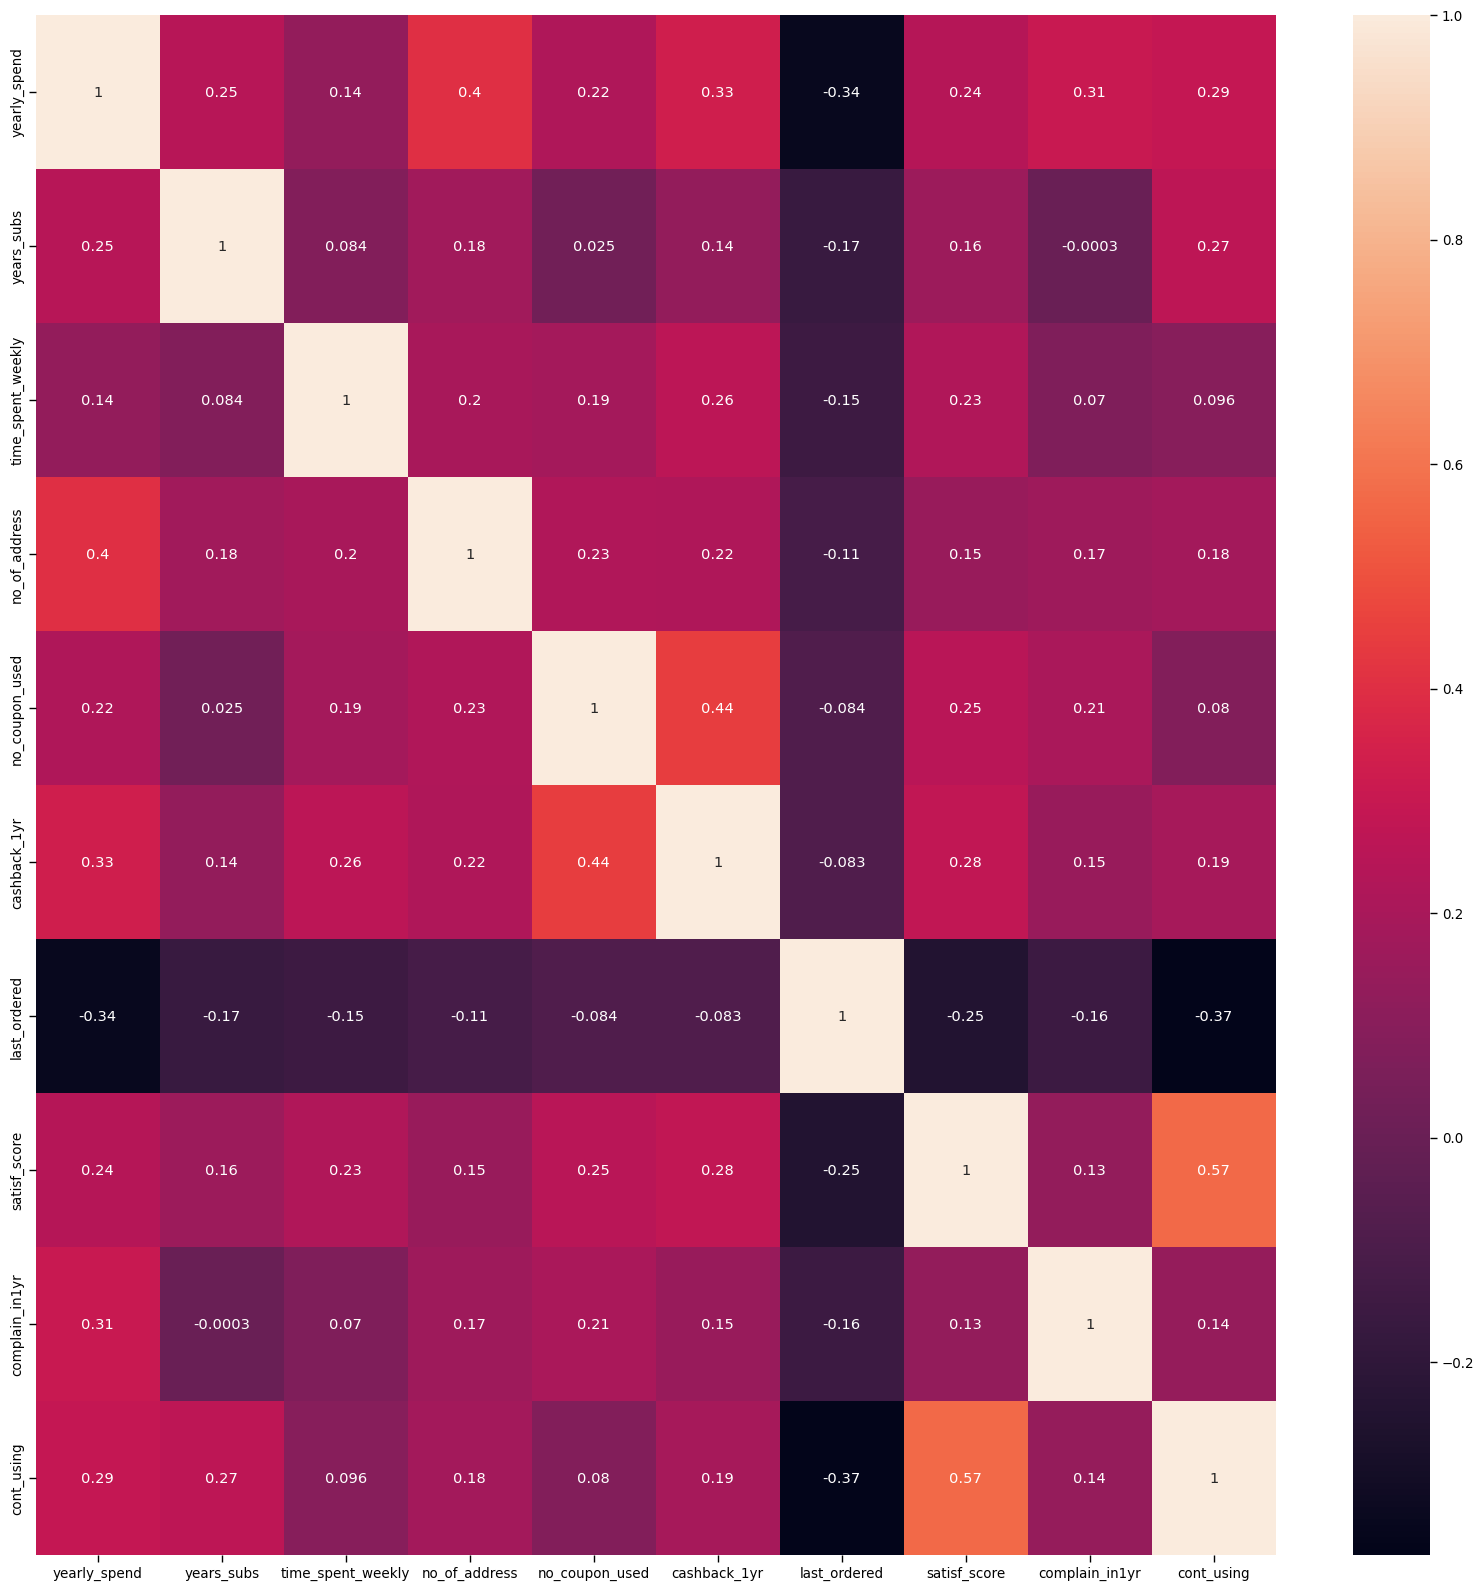

In [51]:
# Correlation matrix
plt.figure(figsize = (20,20))
sns.heatmap(df2.corr(),annot = True)
#annot = True dispalys correlation coefficients in the cell

In [52]:
# cat =  ['Email address', 'age', 'gender', 'Area', 'Marital status', 'Qualification', 'Employment status ', 'Annual Income', 'Freq_usage', 'Recency', 'spending_per_purchase', 'Subscription', 'other_pref_portal', 'login_device_pref', 'most_purchase_cat', 'mode_of_payment', 'no_reg_device', 'usage_rating', 'supp_ser_satisf', 'delivery_time_satisf', 'pref_web_or_app', 'Place_1stheard', 'most_useful_feat', 'reason_subsc', 'likely_reco', 'other_attempt', 'reason_other_attempt', 'improve_sugg', 'aware_discount', 'loyalty_prog', 'pur_promo_eff', 'Churn']

In [53]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

correlation_list = []

for col in cat:
    correlation = cramers_v(df[col], df['Churn'])
    correlation_list.append((col, correlation))

# Display or use the correlation list as needed
for col, correlation in correlation_list:
    print(f"Cramer's V correlation between {col} and Churn: {correlation}")


Cramer's V correlation between Email address and Churn: nan
Cramer's V correlation between age and Churn: 0.0
Cramer's V correlation between gender and Churn: 0.05748438937437138
Cramer's V correlation between Area and Churn: 0.0
Cramer's V correlation between Marital status and Churn: 0.041517434373235095
Cramer's V correlation between Qualification and Churn: 0.0
Cramer's V correlation between Employment status  and Churn: 0.0
Cramer's V correlation between Annual Income and Churn: 0.021258844547992595
Cramer's V correlation between Freq_usage and Churn: 0.3778117752829026
Cramer's V correlation between Recency and Churn: 0.36171905865641496
Cramer's V correlation between spending_per_purchase and Churn: 0.26788836672639393
Cramer's V correlation between Subscription and Churn: 0.1652929197404745
Cramer's V correlation between other_pref_portal and Churn: 0.33557870769879333
Cramer's V correlation between login_device_pref and Churn: 0.0593481434760295
Cramer's V correlation between 

posx and posy should be finite values
posx and posy should be finite values


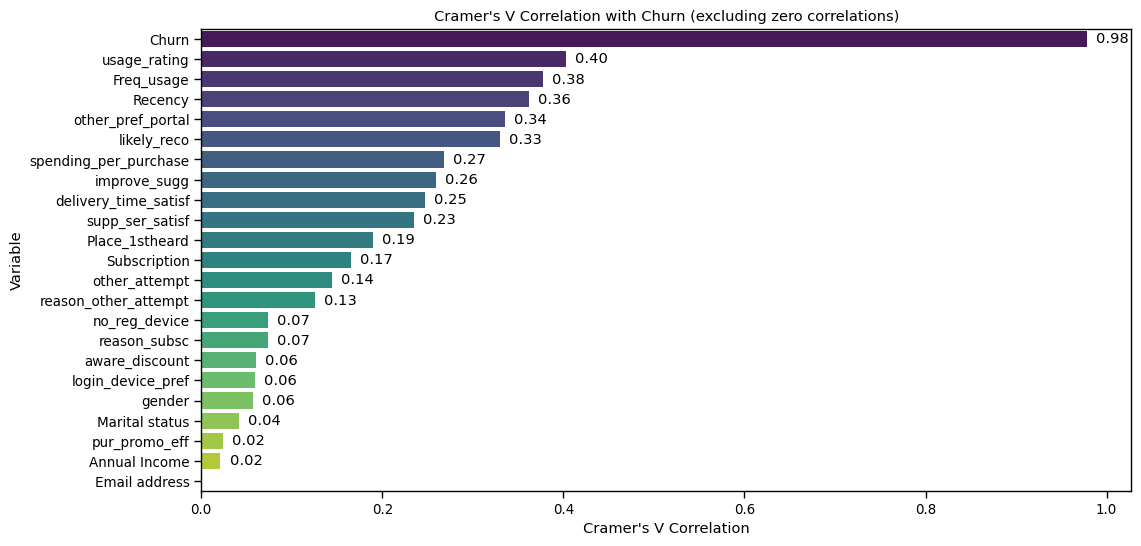

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and cat is your list of categorical variables
correlation_list = []

for col in cat:
    correlation = cramers_v(df[col], df['Churn'])
    correlation_list.append((col, correlation))

# Creating a DataFrame for better plotting
correlation_df = pd.DataFrame(correlation_list, columns=['Variable', "Cramer's V"])

# Filtering out variables with zero correlation
correlation_df = correlation_df[correlation_df["Cramer's V"] != 0]

# Sorting the DataFrame by Cramer's V values for better visualization
correlation_df = correlation_df.sort_values(by="Cramer's V", ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Cramer's V", y='Variable', data=correlation_df, palette='viridis')

# Annotating each bar with its Cramer's V value
for i, v in enumerate(correlation_df["Cramer's V"]):
    plt.text(v + 0.01, i, f'{v:.2f}', color='black', va='center')

plt.title("Cramer's V Correlation with Churn (excluding zero correlations)")
plt.xlabel("Cramer's V Correlation")
plt.ylabel('Variable')
plt.show()


In [55]:
#Modelling

In [56]:
df_encoded = df2.copy()
df_encoded.head()

,Email address,age,gender,Area,Marital status,Qualification,Employment status,Annual Income,Freq_usage,Recency,...,reason_subsc,likely_reco,cont_using,other_attempt,reason_other_attempt,improve_sugg,aware_discount,loyalty_prog,pur_promo_eff,Churn
0,arushi669@gmail.com,25-34,Female,City,Single,Master's degree,Employed,5-10 lacs per annum,Very Frequently (Several times a week),Within the last week,...,Free fast delivery options,Very Likely,5.0,Yes,NaN,NaN,Yes,Yes,Moderately,0
1,divyajain04196@gmail.com,25-34,Female,City,Single,Master's degree,Unemployed,Not applicable,Occasionally (A few times a month),Within the last week,...,Video streaming,Likely,4.0,Yes,NaN,NaN,No,Maybe,Slightly,0
2,sanadktiwari@gmail.com,25-34,Male,City,Single,Master's degree,Student,Not applicable,Frequently (About once a week),Within the last week,...,Video streaming,Neutral,5.0,No,NaN,NaN,No,No,Not at all,0
3,deeptisoni1997@gmail.com,15-24,Female,City,Married,Master's degree,Employed,I do not wish to disclose,Occasionally (A few times a month),Within the last month,...,"Not Applicable, I am not a prime member",Neutral,3.0,Yes,NaN,NaN,No,Maybe,Moderately,1
4,shivamrai.du.or.20@gmail.com,25-34,Male,City,Single,Master's degree,Employed,I do not wish to disclose,Occasionally (A few times a month),Within the last month,...,Video streaming,Neutral,3.0,No,NaN,NaN,Yes,Yes,Moderately,0


In [57]:
df_encoded.info

<bound method DataFrame.info of                     Email address    age  gender  Area Marital status  \
0             arushi669@gmail.com  25-34  Female  City         Single   
1        divyajain04196@gmail.com  25-34  Female  City         Single   
2          sanadktiwari@gmail.com  25-34    Male  City         Single   
3        deeptisoni1997@gmail.com  15-24  Female  City        Married   
4    shivamrai.du.or.20@gmail.com  25-34    Male  City         Single   
..                            ...    ...     ...   ...            ...   
156           navinbs96@gmail.com  25-34    Male  City         Single   
157      aditi.du.or.20@gmail.com  25-34  Female  City         Single   
158    jeevan.rathod911@gmail.com  25-34    Male  City         Single   
159      anitajamadagni@gmail.com  45-54  Female  City        Married   
160   parulsharma221995@gmail.com  25-34  Female  City         Single   

                        Qualification Employment status   \
0                     Master's 

In [58]:
df_encoded = pd.get_dummies(df_encoded,drop_first = True)

In [59]:
df_encoded.head()

,yearly_spend,years_subs,time_spent_weekly,no_of_address,no_coupon_used,cashback_1yr,last_ordered,satisf_score,complain_in1yr,cont_using,...,improve_sugg_customer based memberships,improve_sugg_no,improve_sugg_no,aware_discount_Yes,loyalty_prog_No,loyalty_prog_Yes,pur_promo_eff_Not at all,pur_promo_eff_Significantly,pur_promo_eff_Slightly,Churn_1
0,800.0,1.0,3.5,8.0,5.0,200.0,7.0,5.0,1.0,5.0,...,0,0,0,1,0,1,0,0,0,0
1,0.0,4.0,1.5,1.0,0.0,0.0,7.0,3.0,0.0,4.0,...,0,0,0,0,0,0,0,0,1,0
2,10000.0,5.0,0.5,0.0,0.0,0.0,0.0,4.0,0.0,5.0,...,0,0,0,0,1,0,1,0,0,0
3,15000.0,2.0,0.5,1.0,1.0,0.0,30.0,4.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,1
4,67500.0,3.0,1.0,3.0,5.0,500.0,15.0,3.0,3.0,3.0,...,0,0,0,1,0,1,0,0,0,0


In [60]:
df_encoded.columns

Index(['yearly_spend', 'years_subs', 'time_spent_weekly', 'no_of_address',
       'no_coupon_used', 'cashback_1yr', 'last_ordered', 'satisf_score',
       'complain_in1yr', 'cont_using',
       ...
       'improve_sugg_customer based memberships', 'improve_sugg_no',
       'improve_sugg_no ', 'aware_discount_Yes', 'loyalty_prog_No',
       'loyalty_prog_Yes', 'pur_promo_eff_Not at all',
       'pur_promo_eff_Significantly', 'pur_promo_eff_Slightly', 'Churn_1'],
      dtype='object', length=629)

In [61]:
# Scaling the data
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [62]:
features = df_encoded[num]
features = scaler.fit_transform(features)

In [63]:
features

array([[0.01185185, 0.09090909, 1.        , ..., 1.        , 0.2       ,
        1.        ],
       [0.        , 0.36363636, 0.42857143, ..., 0.33333333, 0.        ,
        0.6       ],
       [0.14814815, 0.45454545, 0.14285714, ..., 0.66666667, 0.        ,
        1.        ],
       ...,
       [1.        , 0.54545455, 0.28571429, ..., 0.66666667, 0.        ,
        1.        ],
       [0.14814815, 0.        , 0.14285714, ..., 0.33333333, 0.2       ,
        1.        ],
       [0.14814815, 0.45454545, 0.28571429, ..., 1.        , 0.4       ,
        1.        ]])

In [64]:
scaled_df_encoded = df_encoded.copy()

In [65]:
scaled_df_encoded.head()

,yearly_spend,years_subs,time_spent_weekly,no_of_address,no_coupon_used,cashback_1yr,last_ordered,satisf_score,complain_in1yr,cont_using,...,improve_sugg_customer based memberships,improve_sugg_no,improve_sugg_no,aware_discount_Yes,loyalty_prog_No,loyalty_prog_Yes,pur_promo_eff_Not at all,pur_promo_eff_Significantly,pur_promo_eff_Slightly,Churn_1
0,800.0,1.0,3.5,8.0,5.0,200.0,7.0,5.0,1.0,5.0,...,0,0,0,1,0,1,0,0,0,0
1,0.0,4.0,1.5,1.0,0.0,0.0,7.0,3.0,0.0,4.0,...,0,0,0,0,0,0,0,0,1,0
2,10000.0,5.0,0.5,0.0,0.0,0.0,0.0,4.0,0.0,5.0,...,0,0,0,0,1,0,1,0,0,0
3,15000.0,2.0,0.5,1.0,1.0,0.0,30.0,4.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,1
4,67500.0,3.0,1.0,3.0,5.0,500.0,15.0,3.0,3.0,3.0,...,0,0,0,1,0,1,0,0,0,0


In [66]:
# k means

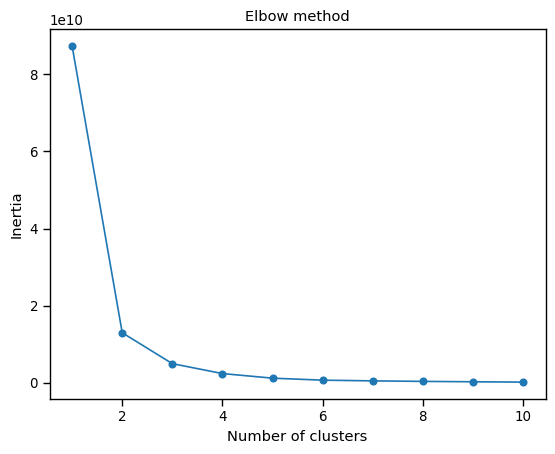

In [67]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df_encoded)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [68]:
scaled_df_encoded_k= scaled_df_encoded.copy()

In [69]:
# Silhoutte scores
Sil_Score = []
for i in range(2,20):
  k_means = KMeans(n_clusters=i)
  k_means.fit(scaled_df_encoded_k)
  labels = k_means.labels_
  ss = silhouette_score(scaled_df_encoded_k,labels)
  Sil_Score.append(ss)

In [70]:
Sil_Score

[0.7858180309059373,
 0.7230451996757707,
 0.7518871612868355,
 0.7054359466804805,
 0.7228257135865893,
 0.7317921027193518,
 0.7497868215937471,
 0.7501930385579948,
 0.7602440216872538,
 0.7629534167674714,
 0.7662699390629492,
 0.7774363747903401,
 0.7863702317525281,
 0.7920742053041502,
 0.7966533270981696,
 0.776879403194473,
 0.8061971397604362,
 0.8100441811424539]

In [71]:
#considering silhouette score and elbow 4 optimal clusters

In [72]:
# taking ideal number of clusters as 3
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df_encoded_k)
labels = k_means.labels_

In [73]:
scaled_df_encoded_k["Clus_kmeans"] = labels
scaled_df_encoded_k.head(10)

,yearly_spend,years_subs,time_spent_weekly,no_of_address,no_coupon_used,cashback_1yr,last_ordered,satisf_score,complain_in1yr,cont_using,...,improve_sugg_no,improve_sugg_no,aware_discount_Yes,loyalty_prog_No,loyalty_prog_Yes,pur_promo_eff_Not at all,pur_promo_eff_Significantly,pur_promo_eff_Slightly,Churn_1,Clus_kmeans
0,800.0,1.0,3.5,8.0,5.0,200.0,7.0,5.0,1.0,5.0,...,0,0,1,0,1,0,0,0,0,0
1,0.0,4.0,1.5,1.0,0.0,0.0,7.0,3.0,0.0,4.0,...,0,0,0,0,0,0,0,1,0,0
2,10000.0,5.0,0.5,0.0,0.0,0.0,0.0,4.0,0.0,5.0,...,0,0,0,1,0,1,0,0,0,0
3,15000.0,2.0,0.5,1.0,1.0,0.0,30.0,4.0,1.0,3.0,...,0,0,0,0,0,0,0,0,1,0
4,67500.0,3.0,1.0,3.0,5.0,500.0,15.0,3.0,3.0,3.0,...,0,0,1,0,1,0,0,0,0,1
5,20000.0,3.0,3.5,4.0,5.0,0.0,3.0,5.0,0.0,5.0,...,0,0,1,0,1,0,0,1,0,2
6,67500.0,3.0,2.0,6.0,2.0,500.0,3.0,4.0,3.0,5.0,...,0,0,1,0,1,0,0,0,0,1
7,30000.0,3.0,0.2,3.0,0.0,0.0,1.0,3.0,0.0,5.0,...,0,0,0,0,1,0,0,0,0,2
8,24000.0,1.0,3.5,3.0,0.0,40.0,14.0,4.0,5.0,5.0,...,0,0,0,1,0,0,1,0,0,2
9,67500.0,3.0,1.0,5.0,5.0,0.0,3.0,5.0,5.0,5.0,...,0,0,1,0,1,0,0,1,0,1


In [74]:
scaled_df_encoded_k.Clus_kmeans.value_counts()

0    95
1    37
2    29
Name: Clus_kmeans, dtype: int64

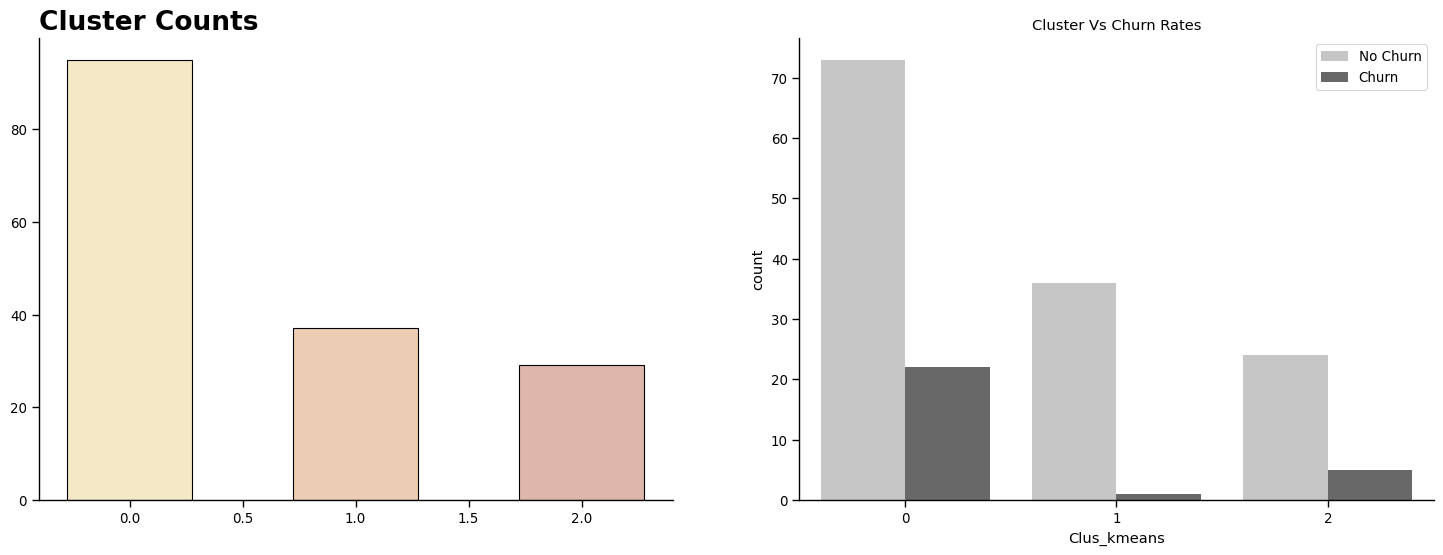

In [75]:
# Cluster Counts
fig, ax = plt.subplots(1,2, figsize=(18, 6))
data_temp = scaled_df_encoded_k.Clus_kmeans.value_counts().sort_index()
ax[0].bar(data_temp.index, data_temp,
          edgecolor='black', color=['#F5E8C7', '#ECCCB2', '#DEB6AB', '#AC7088']
       ,width=0.55 )
ax[0].set_title('Cluster Counts', loc='left', fontsize=19, fontweight='bold')
for i in data_temp.index:
    ax[0].annotate(f"{data_temp[i]}", 
                   xy=(i, data_temp[i] + 80),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='black')
for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)
    
    
sns.countplot(x='Clus_kmeans', hue="Churn_1", palette="Greys", data=scaled_df_encoded_k)
sns.despine()
plt.legend(title='', loc='upper right', labels=['No Churn', 'Churn'])
plt.title("Cluster Vs Churn Rates")
plt.show()
    

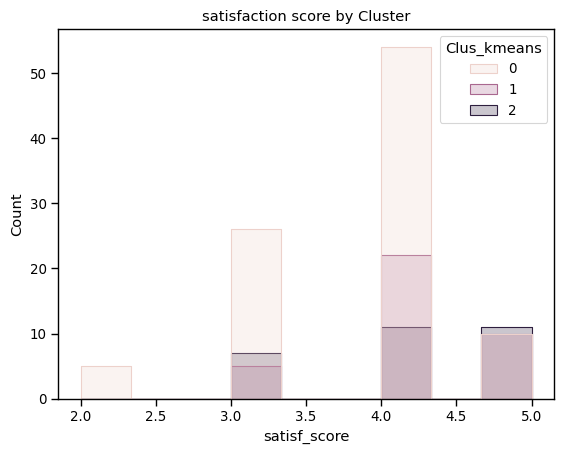

In [76]:
# satisfaction score by cluster
sns.histplot(data=scaled_df_encoded_k, x="satisf_score", hue="Clus_kmeans", element="step")
plt.title('satisfaction score by Cluster')
plt.show()


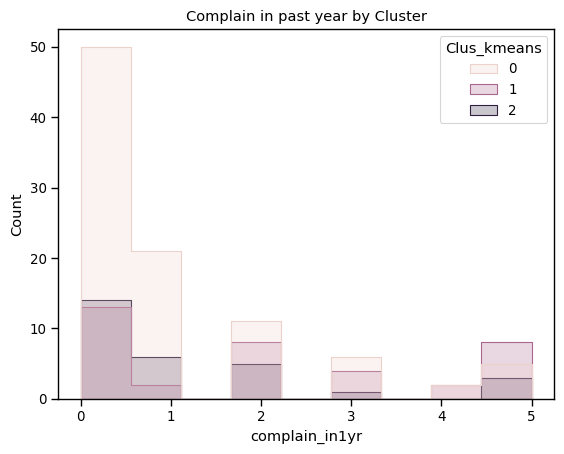

In [77]:
# satisfaction score by cluster
sns.histplot(data=scaled_df_encoded_k, x="complain_in1yr", hue="Clus_kmeans", element="step")
plt.title('Complain in past year by Cluster')
plt.show()


In [78]:
#Train test split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X=scaled_df_encoded_k.drop(['Churn_1'],axis=1)
y=scaled_df_encoded_k['Churn_1']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=42)

In [81]:
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of y_train: {} \n'.format(y_train.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, the shape of X_train: (120, 629)
Before OverSampling, the shape of y_train: (120,) 

Before OverSampling, counts of label '1': 22
Before OverSampling, counts of label '0': 98


In [82]:
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_classification

# Assuming you have your imbalanced dataset (X, y)
# X is the feature matrix, y is the target variable

# Create a synthetic dataset using ADASYN
adasyn = ADASYN(sampling_strategy='auto', n_neighbors=6)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

# Now, X_resampled and y_resampled contain the balanced dataset

In [83]:
print('After OverSampling, the shape of X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of X: (196, 629)
After OverSampling, the shape of y: (196,) 

After OverSampling, counts of label '1': 98
After OverSampling, counts of label '0': 98


In [84]:
#lda

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [86]:
lda = LinearDiscriminantAnalysis(n_components = 1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [87]:
#Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [89]:
model_lr = LogisticRegression()
model_lr.fit(X_train_lda, y_train)

LogisticRegression()

In [90]:
ytrain_predict = model_lr.predict(X_train_lda)
ytest_predict = model_lr.predict(X_test_lda)

AUC: 0.857


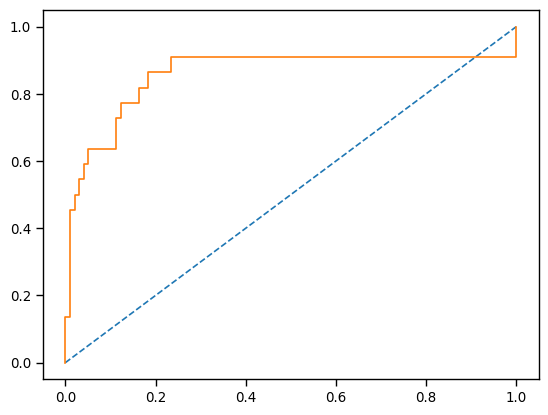

In [91]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = model_lr.predict_proba(X_train_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.852


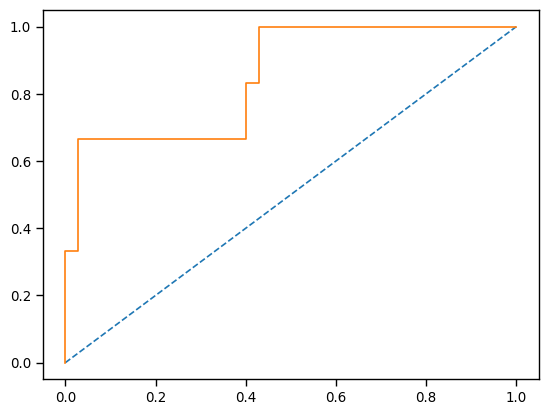

In [92]:
# predict probabilities
probs = model_lr.predict_proba(X_test_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<Axes: >

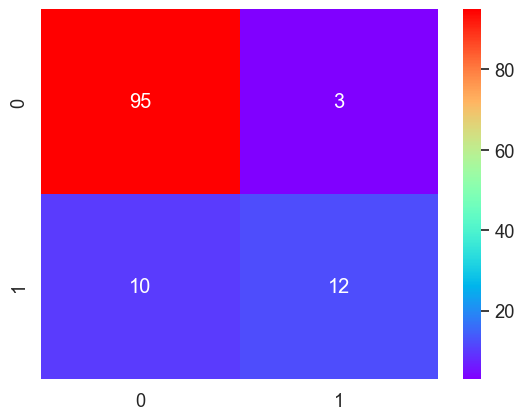

In [93]:
#confusion matrix training Data
cm_lr = confusion_matrix(y_train, ytrain_predict)
cm_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = 'd', cmap ='rainbow')

In [94]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        98
           1       0.80      0.55      0.65        22

    accuracy                           0.89       120
   macro avg       0.85      0.76      0.79       120
weighted avg       0.89      0.89      0.88       120



<Axes: >

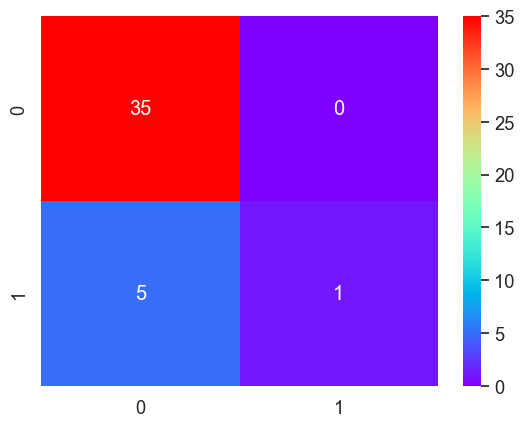

In [95]:
#confusion matrix test Data
cm_test_lr=confusion_matrix(y_test, ytest_predict)
cm_test_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lr,annot = True,fmt = 'd', cmap='rainbow')

In [96]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        35
           1       1.00      0.17      0.29         6

    accuracy                           0.88        41
   macro avg       0.94      0.58      0.61        41
weighted avg       0.89      0.88      0.84        41



In [97]:
#linear regression


In [98]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Split the dataset into features (X) and target variable (y)
# X = scaled_df_encoded[['yearly_spend', 'years_subs', 'time_spent_weekly', 'no_of_address', 'no_coupon_used', 'cashback_1yr', 'last_ordered', 'satisf_score', 'complain_in1yr', 'cont_using']]
# y = scaled_df_encoded['Churn_1']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a linear regression model
# model = LinearRegression()

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

# # Display the coefficients and intercept
# print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)


In [99]:
# from sklearn.linear_model import LinearRegression

# # Assuming model is your linear regression model and X_test, y_test are your test data
# r_squared = model.score(X_test, y_test)

# print(f'R-squared: {r_squared}')

In [100]:
# from sklearn.linear_model import LinearRegression

# # Assuming model is your linear regression model and X_test, y_test are your test data
# r_squared = model.score(X_train, y_train)

# print(f'R-squared: {r_squared}')

In [101]:
scaled_df_encoded


,yearly_spend,years_subs,time_spent_weekly,no_of_address,no_coupon_used,cashback_1yr,last_ordered,satisf_score,complain_in1yr,cont_using,...,improve_sugg_customer based memberships,improve_sugg_no,improve_sugg_no,aware_discount_Yes,loyalty_prog_No,loyalty_prog_Yes,pur_promo_eff_Not at all,pur_promo_eff_Significantly,pur_promo_eff_Slightly,Churn_1
0,800.0,1.0,3.5,8.0,5.0,200.0,7.0,5.0,1.0,5.0,...,0,0,0,1,0,1,0,0,0,0
1,0.0,4.0,1.5,1.0,0.0,0.0,7.0,3.0,0.0,4.0,...,0,0,0,0,0,0,0,0,1,0
2,10000.0,5.0,0.5,0.0,0.0,0.0,0.0,4.0,0.0,5.0,...,0,0,0,0,1,0,1,0,0,0
3,15000.0,2.0,0.5,1.0,1.0,0.0,30.0,4.0,1.0,3.0,...,0,0,0,0,0,0,0,0,0,1
4,67500.0,3.0,1.0,3.0,5.0,500.0,15.0,3.0,3.0,3.0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,10000.0,0.0,1.0,5.0,2.0,0.0,20.0,5.0,0.0,5.0,...,0,0,0,0,0,1,0,1,0,0
157,4000.0,4.0,1.0,3.0,1.0,190.0,15.0,4.0,2.0,5.0,...,0,0,0,1,0,1,0,0,0,0
158,67500.0,6.0,1.0,4.0,0.0,0.0,20.0,4.0,0.0,5.0,...,0,0,0,0,0,0,0,0,1,0
159,10000.0,0.0,0.5,1.0,0.0,500.0,25.0,3.0,1.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
print(num)

['yearly_spend', 'years_subs', 'time_spent_weekly', 'no_of_address', 'no_coupon_used', 'cashback_1yr', 'last_ordered', 'satisf_score', 'complain_in1yr', 'cont_using']


In [103]:
#decision tree

In [104]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train_lda, y_train)

DecisionTreeClassifier()

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        22

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



<Axes: >

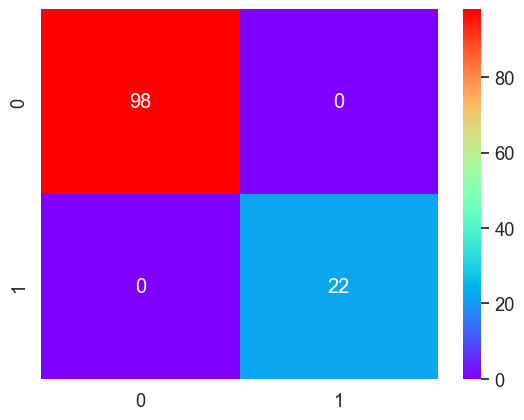

In [105]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train_lda)
model_score = DT_model.score(X_train_lda, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_dt = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_dt, annot = True,fmt = 'd', cmap='rainbow')

0.8780487804878049
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        35
           1       0.67      0.33      0.44         6

    accuracy                           0.88        41
   macro avg       0.78      0.65      0.69        41
weighted avg       0.86      0.88      0.86        41

Confusion Matrix


<Axes: >

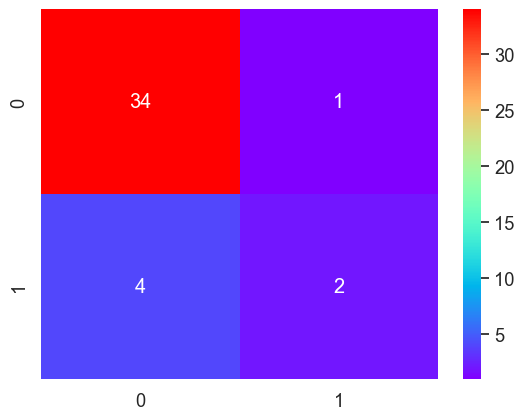

In [106]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test_lda)
model_score = DT_model.score(X_test_lda, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_dt = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_dt, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


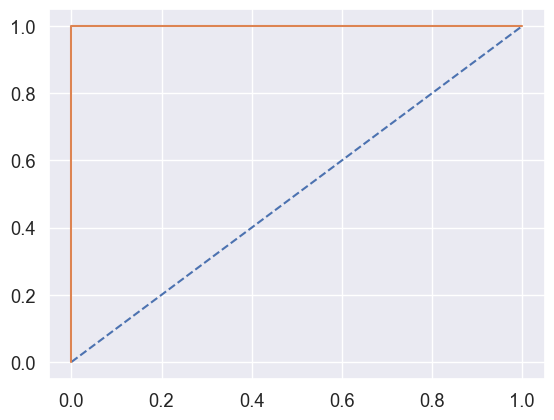

In [107]:
# predict probabilities
probs = DT_model.predict_proba(X_train_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.652


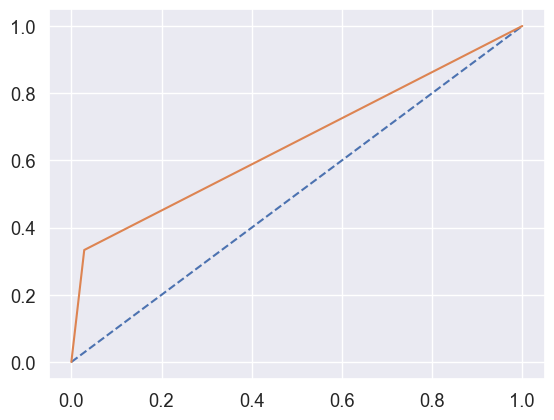

In [108]:
# predict probabilities
probs = DT_model.predict_proba(X_test_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [109]:
#cross validation


In [110]:
from sklearn.model_selection import cross_val_score, KFold

In [111]:
#splits show number of partion we want to test the data for overfitting i.e if certain portion contributed to the overfitting hence neglecting unseen pattern
kfold = KFold(n_splits = 4, shuffle = True, random_state = 42)

In [112]:
#if scores for all folds are in the same range or nearing 100% then there is no overfitting
scores = cross_val_score(DT_model, X, y, cv = kfold, scoring = 'accuracy')

In [113]:
#higher mean_accuracy and lower std_accuracy is better
mean_accuracy = scores.mean()
std_accuracy = scores.std()

In [114]:
mean_accuracy

0.96875

In [115]:
std_accuracy

0.05412658773652741

In [116]:
#scores for each fold
scores

array([1.   , 0.875, 1.   , 1.   ])

In [117]:
# From the above scores we can deduce that no overfitting is found to contribute to the 100% accuracy of decision tree

In [118]:
#RANDOM FOREST

In [119]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train_lda, y_train)

RandomForestClassifier(random_state=1)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        22

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Confusion Matrix


<Axes: >

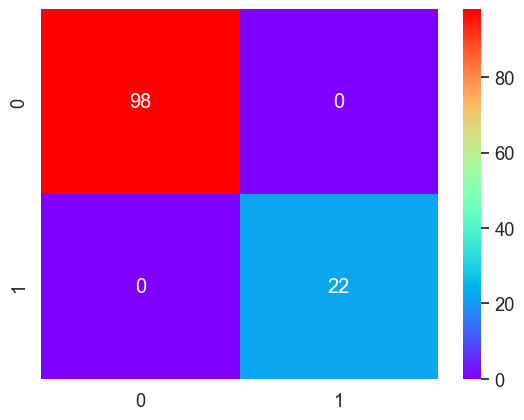

In [120]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train_lda)
model_score =RF_model.score(X_train_lda, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_rf = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_rf, annot = True,fmt = 'd', cmap='rainbow')

0.8780487804878049
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        35
           1       0.67      0.33      0.44         6

    accuracy                           0.88        41
   macro avg       0.78      0.65      0.69        41
weighted avg       0.86      0.88      0.86        41

Confusion Matrix


<Axes: >

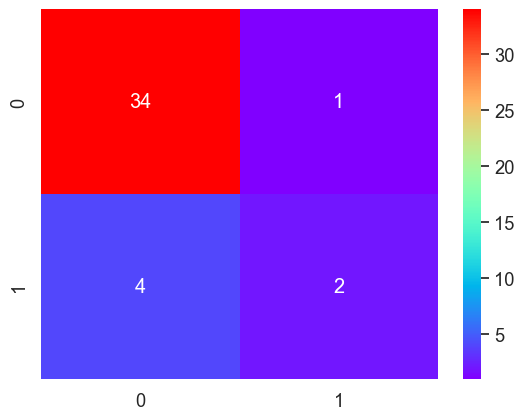

In [121]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test_lda)
model_score = RF_model.score(X_test_lda, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_rf = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_rf, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


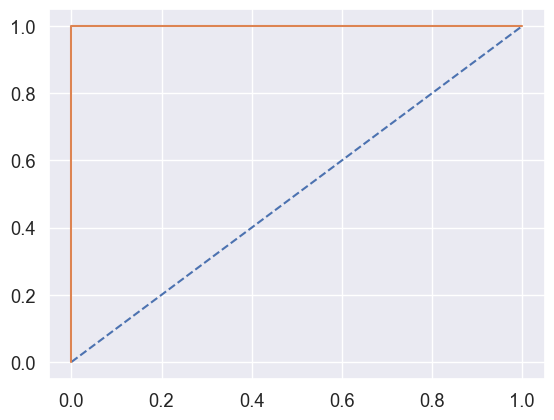

In [122]:
# predict probabilities
probs = RF_model.predict_proba(X_train_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.890


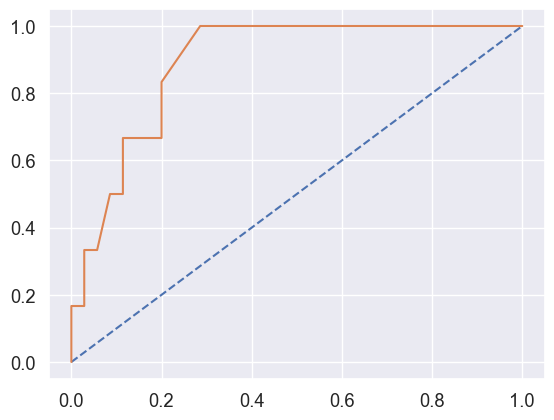

In [123]:
# predict probabilities
probs = RF_model.predict_proba(X_test_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [124]:
#if scores for all folds are in the same range or nearing 100% then there is no overfitting
scores = cross_val_score(RF_model, X, y, cv = kfold, scoring = 'accuracy')

In [125]:
scores

array([0.87804878, 0.825     , 0.825     , 0.85      ])

In [126]:
# KNN


In [127]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train_lda,y_train)

KNeighborsClassifier()

0.9
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        98
           1       0.81      0.59      0.68        22

    accuracy                           0.90       120
   macro avg       0.86      0.78      0.81       120
weighted avg       0.89      0.90      0.89       120

Confusion Matrix


<Axes: >

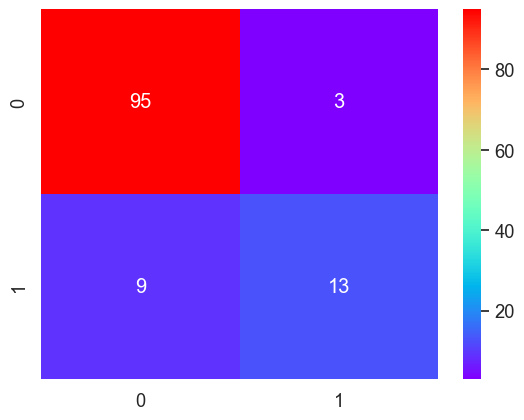

In [128]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train_lda)
model_score = KNN_model.score(X_train_lda, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_knn = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_knn, annot = True,fmt = 'd', cmap='rainbow')

0.8780487804878049
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        35
           1       1.00      0.17      0.29         6

    accuracy                           0.88        41
   macro avg       0.94      0.58      0.61        41
weighted avg       0.89      0.88      0.84        41

Confusion Matrix


<Axes: >

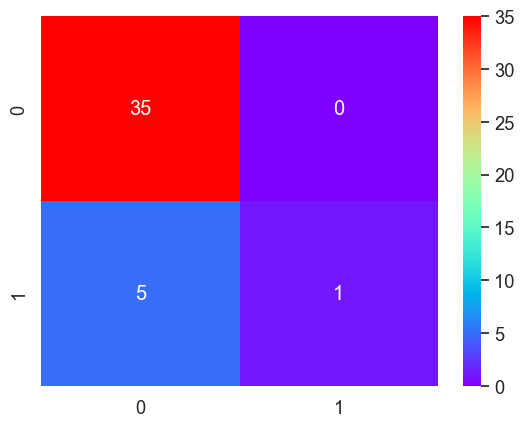

In [129]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test_lda)
model_score = KNN_model.score(X_test_lda, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_knn = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_knn, annot = True,fmt = 'd', cmap='rainbow')

AUC: 0.954


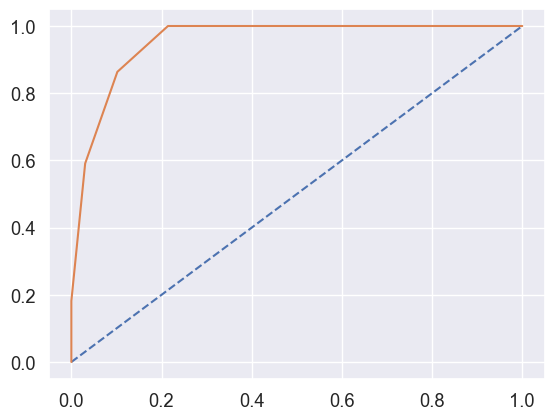

In [130]:
# predict probabilities
probs = KNN_model.predict_proba(X_train_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.845


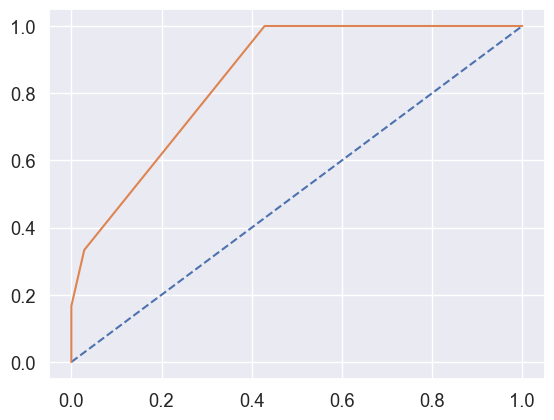

In [131]:
# predict probabilities
probs = KNN_model.predict_proba(X_test_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [132]:
#changing the threshold to see if results improve

In [133]:
y_proba = KNN_model.predict_proba(X_test_lda)[:, 1]


In [134]:
custom_threshold = 0.4

In [135]:
y_pred_custom_threshold = np.where(y_proba >= custom_threshold, 1, 0)

In [136]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# Evaluate the model using the custom threshold
print("Accuracy:", accuracy_score(y_test, y_pred_custom_threshold))
print("Classification Report:")
print(classification_report(y_test, y_pred_custom_threshold))

Accuracy: 0.8780487804878049
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        35
           1       0.67      0.33      0.44         6

    accuracy                           0.88        41
   macro avg       0.78      0.65      0.69        41
weighted avg       0.86      0.88      0.86        41



AUC: 0.954


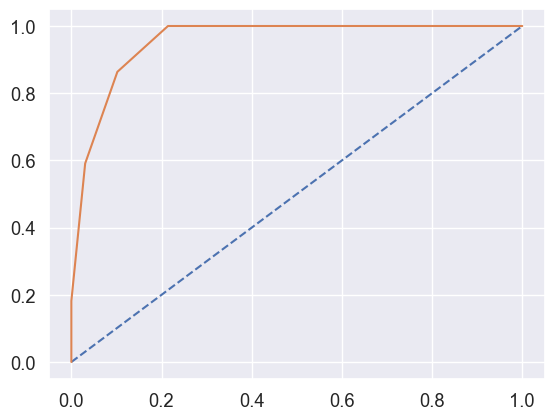

In [137]:
# predict probabilities
probs = KNN_model.predict_proba(X_train_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [152]:
# # predict probabilities
# probs = KNN_model.predict_proba(X_test_lda)
# # keep probabilities for the positive outcome only
# probs = probs[:, 1]
# # calculate AUC
# test_auc = roc_auc_score(# predict probabilities
# probs = KNN_model.predict_proba(X_test_lda)
# # keep probabilities for the positive outcome only
# probs = probs[:, 1]
# # calculate AUC
# test_auc = roc_auc_score(y_test, probs)
# print('AUC: %.3f' % test_auc)
# # calculate roc curve
# test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(test_fpr, test_tpr), probs)
# print('AUC: %.3f' % test_auc)
# # calculate roc curve
# test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(test_fpr, test_tpr)

AUC: 0.845


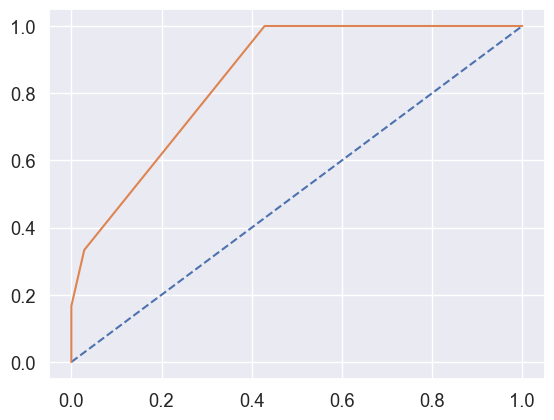

In [151]:
# predict probabilities
probs = KNN_model.predict_proba(X_test_lda)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)

# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr)
plt.show()


In [ ]:
# HYPOTHESIS TESTING

In [150]:
# Create a contingency table
contingency_table = pd.crosstab(df1['usage_rating'], df1['Churn'])

# Get dimensions of the contingency table
R, C = contingency_table.shape

# Calculate degrees of freedom
df = (R - 1) * (C - 1)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results including degrees of freedom
print(f"Chi-Square Value: {chi2}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p}")

# Check for significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Value: 29.932234575634197
Degrees of Freedom: 4
P-value: 5.052393429485121e-06
There is a significant association between the variables.


In [141]:
cat

['Email address',
 'age',
 'gender',
 'Area',
 'Marital status',
 'Qualification',
 'Employment status ',
 'Annual Income',
 'Freq_usage',
 'Recency',
 'spending_per_purchase',
 'Subscription',
 'other_pref_portal',
 'login_device_pref',
 'most_purchase_cat',
 'mode_of_payment',
 'no_reg_device',
 'usage_rating',
 'supp_ser_satisf',
 'delivery_time_satisf',
 'pref_web_or_app',
 'Place_1stheard',
 'most_useful_feat',
 'reason_subsc',
 'likely_reco',
 'other_attempt',
 'reason_other_attempt',
 'improve_sugg',
 'aware_discount',
 'loyalty_prog',
 'pur_promo_eff',
 'Churn']

In [143]:
# Create a contingency table
contingency_table = pd.crosstab(df1['Freq_usage'], df1['Churn'])

# Get dimensions of the contingency table
R, C = contingency_table.shape

# Calculate degrees of freedom
df = (R - 1) * (C - 1)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results including degrees of freedom
print(f"Chi-Square Value: {chi2}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p}")

# Check for significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Value: 26.86278587092732
Degrees of Freedom: 4
P-value: 2.118987601495148e-05
There is a significant association between the variables.


In [145]:
# Create a contingency table
contingency_table = pd.crosstab(df1['Recency'], df1['Churn'])

# Get dimensions of the contingency table
R, C = contingency_table.shape

# Calculate degrees of freedom
df = (R - 1) * (C - 1)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results including degrees of freedom
print(f"Chi-Square Value: {chi2}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p}")

# Check for significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Value: 25.964940629011554
Degrees of Freedom: 5
P-value: 9.064396225653272e-05
There is a significant association between the variables.


In [146]:
# Create a contingency table
contingency_table = pd.crosstab(df1['other_pref_portal'], df1['Churn'])

# Get dimensions of the contingency table
R, C = contingency_table.shape

# Calculate degrees of freedom
df = (R - 1) * (C - 1)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results including degrees of freedom
print(f"Chi-Square Value: {chi2}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p}")

# Check for significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Value: 76.37988721804511
Degrees of Freedom: 58
P-value: 0.053250726975993826
There is no significant association between the variables.


In [148]:
# Create a contingency table
contingency_table = pd.crosstab(df1['likely_reco'], df1['Churn'])

# Get dimensions of the contingency table
R, C = contingency_table.shape

# Calculate degrees of freedom
df = (R - 1) * (C - 1)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results including degrees of freedom
print(f"Chi-Square Value: {chi2}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p}")

# Check for significance
alpha = 0.05
if p < alpha:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")


Chi-Square Value: 22.498081356980254
Degrees of Freedom: 5
P-value: 0.00042089976001048507
There is a significant association between the variables.


In [149]:
df1['Churn'].value_counts()

0    133
1     28
Name: Churn, dtype: int64